## **Setup**

In this section, we will setup all the computing environment to allow you to run the analyses needed for this part.

In [1]:
# Note: this does not seem to work with R 4.4
# Keeping this cell for future reference only.
# ===========================================
# ## https://stackoverflow.com/questions/70025153/how-to-access-the-shell-in-google-colab-when-running-the-r-kernel
# shell_call <- function(command, ...) {
#   result <- system(command, intern = TRUE, ...)
#   cat(paste0(result, collapse = "\n"))
# }
# loadPackages = function(pkgs){
#   myrequire = function(...){
#     suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
#   }
#   ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
#   if (!all(ok)){
#     message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
#   }
# }

# # Install curl if missing
# shell_call("apt update -qq")
# shell_call("apt install -y --no-install-recommends curl ca-certificates")
# # Run apt script

# #shell_call("curl https://raw.githubusercontent.com/Bioconductor/bioc2u/devel/apt_setup.sh | sudo bash")
# #bspm::enable()
# #options(bspm.version.check=FALSE)
# ## Install the R packages
# cranPkgs2Install = c("BiocManager", "ggpubr", "Seurat", "cowplot",
#                      "Rtsne", "hdf5r", "clustree")
# install.packages(cranPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)
# biocPkgs2Install = c("clusterProfiler", "preprocessCore", "rols",
#                      "scDblFinder","clusterExperiment", "SingleR",
#                      "celldex", "org.Hs.eg.db")
# BiocManager::install(biocPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)

In [2]:
## https://stackoverflow.com/questions/70025153/how-to-access-the-shell-in-google-colab-when-running-the-r-kernel
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

## Setup R2U
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

## Install the R packages
cranPkgs2Install = c("BiocManager", "ggpubr", "Seurat", "cowplot",
                     "Rtsne", "hdf5r", "clustree")
install.packages(cranPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)
biocPkgs2Install = c("clusterProfiler", "preprocessCore", "rols",
                     "scDblFinder","clusterExperiment", "SingleR",
                     "celldex", "org.Hs.eg.db")
BiocManager::install(biocPkgs2Install, ask=FALSE, update=TRUE, quietly=TRUE)

137 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
wget is already the newest version (1.21.2-2ubuntu1).
ca-certificates is already the newest version (20230311ubuntu0.22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
The following packages were automatically installed and are no longer required:
  libjs-highlight.js r-cran-svglite
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 137 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW

Tracing function "install.packages" in package "utils"

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'preprocessCore' 'rols' 'clusterExperiment'
  'celldex'”
Installing package(s) 'clusterProfiler', 'scDblFinder', 'SingleR',
  'org.Hs.eg.db'

Old packages: 'annotate', 'AnnotationDbi', 'AnnotationHub', 'beachmat',
  'BiocFileCache', 'BiocIO', 'BiocNeighbors', 'BiocParallel', 'BiocSingular',
  'Biostrings', 'bluster', 'clusterProfiler', 'DelayedArray',
  'DelayedMatrixStats', 'DOSE', 'edgeR', 'enrichplot', 'ExperimentHub',
  'fgsea', 'genefilter', 'GenomeInfoDb', 'GenomicAlignments', 'GenomicRanges',
  'ggtree', 'GO.db', 'GOSemSim', 'HDF5Array', '

In [3]:
## To simplify package loading, we created the loadPackages()
## function. But, if you don't have the function, you should
## use 'library(name_of_package)'
pkgs = c("Rtsne", "Seurat", "tidyverse", "cowplot",
         "scDblFinder", "clustree", "preprocessCore",
         "clusterProfiler", "celldex")
loadPackages(pkgs)


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    %||%, intersect, t



Attaching package: ‘Seurat’


The following object is masked from ‘package:base’:

    %||%


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks Seurat::%||%(), SeuratObject::%||%(), base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’

Then, load the libraries that you previously installed.

* **Rtsne:** Input
 input data matrix
* **Seurat:** Seurat is an R package designed for QC, analysis, and exploration of single cell RNA-seq data.
* **scDblFinder:** The scDblFinder package gathers various methods for the detection and handling of doublets/multiplets in single-cell sequencing data (i.e. multiple cells captured within the same droplet or reaction volume)
* **Cowplot:** Provides various features that help with creating publication-quality figures with `ggplot2`, such as a set of themes, functions to align plots and arrange them into complex compound figures, and functions that make it easy to annotate plots and or mix plots with images.
* **clustree:** This visualization shows the relationships between clusters at multiple resolutions, allowing researchers to see how samples move as the number of clusters increases.
* **PreprocessCore:** A collection of pre-processing functions

## Data input, sparse UMI-count matrix
https://www.nature.com/articles/s41591-020-0901-9

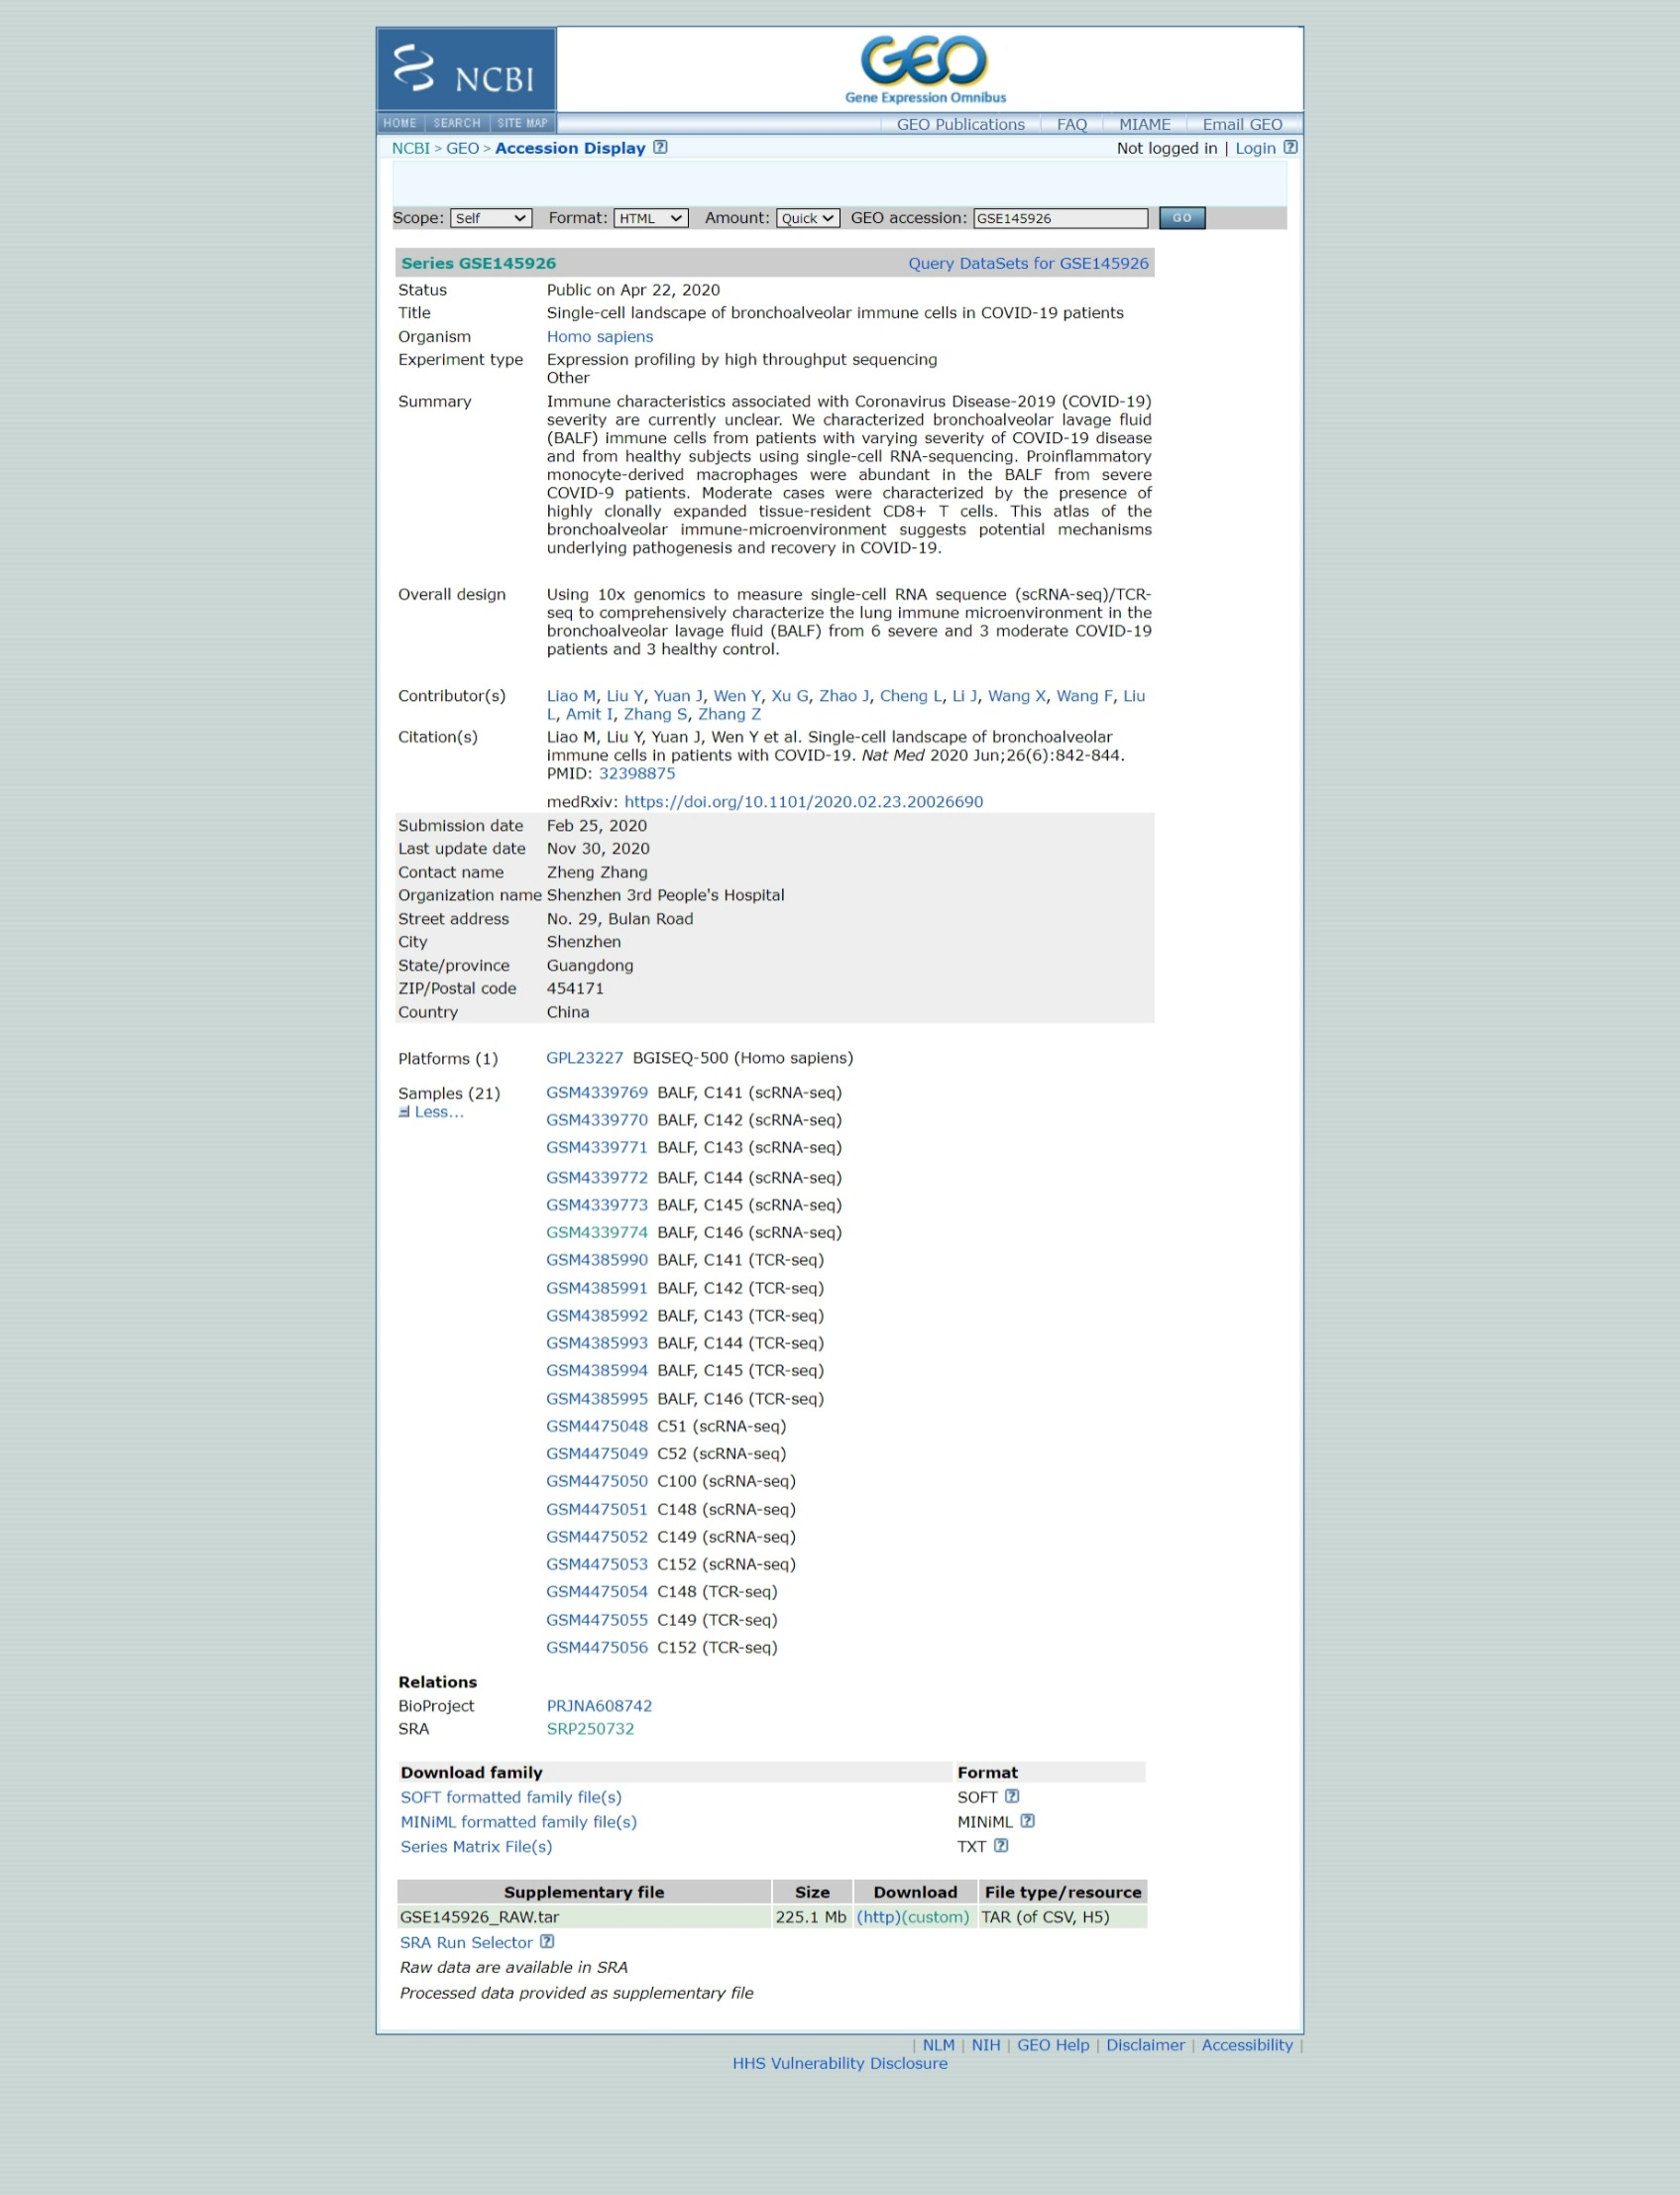

Download the GEO's raw data

In [4]:
download.file('https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE145926&format=file','GSE145926_RAW.tar')
shell_call("tar -xf GSE145926_RAW.tar")
shell_call("rm GSE145926_RAW.tar")
shell_call("ls -lh")

total 227M
-rw-rw-r-- 1 4710 5007  21M Feb 19  2020 GSM4339769_C141_filtered_feature_bc_matrix.h5
-rw-r--r-- 1 root root 921K May  9 21:59 GSM4339769_doubletFile.txt
-rw-rw-r-- 1 4710 5007  21M Feb 19  2020 GSM4339770_C142_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007  52M Feb 19  2020 GSM4339771_C143_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007 4.1M Feb 19  2020 GSM4339772_C144_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007  30M Feb 19  2020 GSM4339773_C145_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007 6.1M Feb 19  2020 GSM4339774_C146_filtered_feature_bc_matrix.h5
-rw-rw-r-- 1 4710 5007  93K Mar  5  2020 GSM4385990_C141_filtered_contig_annotations.csv.gz
-rw-rw-r-- 1 4710 5007  96K Mar  5  2020 GSM4385991_C142_filtered_contig_annotations.csv.gz
-rw-rw-r-- 1 4710 5007 175K Mar  5  2020 GSM4385992_C143_filtered_contig_annotations.csv.gz
-rw-rw-r-- 1 4710 5007  12K Mar  5  2020 GSM4385993_C144_filtered_contig_annotations.csv.gz
-rw-rw-r-- 1 4710 5007  33K Mar

Separate the scRNA and TCRseq files.

In [5]:
shell_call("mkdir -p TCRseq")
shell_call("mv *_filtered_contig_annotations.csv.gz TCRseq/")
shell_call("mkdir -p scRNAseq")
shell_call("mv *_filtered_* scRNAseq/")
shell_call("ls -lh")

total 936K
-rw-r--r-- 1 root root 921K May  9 21:59 GSM4339769_doubletFile.txt
drwxr-xr-x 1 root root 4.0K May  8 21:21 sample_data
drwxr-xr-x 2 root root 4.0K May  9 22:03 scRNAseq
drwxr-xr-x 2 root root 4.0K May  9 22:03 TCRseq

We're now going to read data for one sample. The 10X data is usually stored in the HDF5 format, which is a scientific high-performance format. The Read10X_h5() command is able to import this data and load it into R, using a special type of matrix, which has an efficient way of representing data with lots of zeroes.

How were these files created?

In [6]:
sc <- Read10X_h5("scRNAseq/GSM4339769_C141_filtered_feature_bc_matrix.h5")

In [7]:
## is there anything special about this matrix?
sc[33493:33500,1:3]

8 x 3 sparse Matrix of class "dgCMatrix"
       AAACCTGAGATGTCGG-1 AAACCTGAGGCTCATT-1 AAACCTGAGTTGTCGT-1
PCNT                    .                  .                  .
DIP2A                   .                  .                  .
S100B                   .                  .                  .
PRMT2                   1                  2                  .
MT-ND1                  5                 65                 57
MT-ND2                  1                 38                 48
MT-CO1                 18                100                118
MT-CO2                  4                 91                210

The . values in the matrix represent 0s (no molecules detected). Since most values in an scRNA-seq matrix are 0, Seurat uses a sparse-matrix representation whenever possible. This results in significant memory and speed savings for Drop-seq/inDrop/10x data. Observe, below, how the size of the object changes significantly (was ~1600MB and now is less then 160MB: this is a 10-fold change...)

In [8]:
dense.size <- object.size(as.matrix(sc))
sparse.size <- object.size(sc)
format(dense.size, "MB")
format(sparse.size, "MB")
dense.size/sparse.size

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.6 GiB”


[1] "1601.7 Mb"

[1] "158.6 Mb"

10.1 bytes

We use the usual matrix commands to handle a sparse matrix. See below how to:

Know the dimensions of the matrix;
Identify the class of a sparse matrix;
Select rows and columns of a sparse matrix using numeric indices;
Extract the names of the columns (or of the rows);
Select rows (or columns) of a sparse matrix using the names of the rows (or columns)

In [9]:
## how many features?
## how many cells?
dim(sc)

## what's the class: sparse matrix
class(sc)

## select some rows and some columns
## is there anything special about this matrix?
sc[33495:33500,1:3]

## select using rownames (colnames)
sc[c("MIR1302-2HG","FAM138A","OR4F5"), 1:30]

## what are the names of genes
rownames(sc)[1:3]

## extract the names of cells
colnames(sc)[1:3]

[1] 33539  6249

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

6 x 3 sparse Matrix of class "dgCMatrix"
       AAACCTGAGATGTCGG-1 AAACCTGAGGCTCATT-1 AAACCTGAGTTGTCGT-1
S100B                   .                  .                  .
PRMT2                   1                  2                  .
MT-ND1                  5                 65                 57
MT-ND2                  1                 38                 48
MT-CO1                 18                100                118
MT-CO2                  4                 91                210

  [[ suppressing 30 column names ‘AAACCTGAGATGTCGG-1’, ‘AAACCTGAGGCTCATT-1’, ‘AAACCTGAGTTGTCGT-1’ ... ]]



3 x 30 sparse Matrix of class "dgCMatrix"
                                                                       
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

[1] "MIR1302-2HG" "FAM138A"     "OR4F5"

[1] "AAACCTGAGATGTCGG-1" "AAACCTGAGGCTCATT-1" "AAACCTGAGTTGTCGT-1"

How big is this count table?

In [10]:
print(dim(sc))
print(class(sc))

[1] 33539  6249
[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"


## Quality control

We will create the Seurat object to proceed with downstream analyses. Here, we chose to remove genes observed in fewer than 3 cells and cells with fewer than 200 genes. These filtering steps are not essential, feel free to use different cutoffs or ignore them entirely at this stage.

In [11]:
sampleA <- CreateSeuratObject(counts = sc, project="sampleA", min.cells=3, min.features=200)

In [12]:
## QC metrics for the first 5 cells
head(sampleA@meta.data, 5)

orig.ident nCount_RNA nFeature_RNA
AAACCTGAGATGTCGG-1 sampleA     3731      1594        
AAACCTGAGGCTCATT-1 sampleA    33339      5273        
AAACCTGCAATCCGAT-1 sampleA     5727      1789        
AAACCTGCATGGTCAT-1 sampleA     4396      2002        
AAACCTGGTTTAGCTG-1 sampleA     3219      1451

What do we know about the sampleA object? How many genes and how many cells does the Seurat object have? Also, why are these numbers different? Remember that we created the Seurat object specifying that each gene had to be present in, at least, 3 cells (otherwise, the gene is removed). We also specified that each cell is required to have, at least, 200 genes.

In [13]:
sampleA

An object of class Seurat 
20271 features across 4233 samples within 1 assay 
Active assay: RNA (20271 features, 0 variable features)
 1 layer present: counts

In [14]:
## Let's check the dimensions of the original matrix (sc)
## and compared to the Seurat object (sampleA)
dim(sc)
dim(sampleA)
dim(sc) - dim(sampleA)

[1] 33539  6249

[1] 20271  4233

[1] 13268  2016

What is the size of our Seurat object?
How many genes and cells were removed from original table?

Identifying Doublets
Doublets of cells in the same well is a common problem in single-cell data. This can happen very often by overloading cells.

We will use the scDblFinder method to identify and remove this problematic cases from our dataset. The method needs to use an object called SingleCellExperiment, which is created within the Bioconductor infrastructure.

Once the object is ready, we apply the method. It uses a probabilist approach to identify doublets and, for this reason, can generate results that are slightly different from previous runs. To mitigate this reproducibility issue, we need to set a random seed, using the set.seed() command, which will guarantee that we get the same results everytime we run the code.

In [15]:
## data <- sampleA
sce <- as.SingleCellExperiment(sampleA)
sce

## We need to set.seed() because the scDblFinder command
## uses a probabilist strategy to identify doublets. This
## means that, everytime we run the command, it will produce
## results that are slightly different. The set.seed()
## comman will guarantee the same results everytime.
set.seed(123)
results <- scDblFinder(sce, returnType = 'table') %>%
  as.data.frame() %>%
  filter(type == 'real')
head(results)

Warning message:
“Layer ‘data’ is empty”
Warning message:
“Layer ‘scale.data’ is empty”


class: SingleCellExperiment 
dim: 20271 4233 
metadata(0):
assays(1): counts
rownames(20271): AL627309.1 AL669831.2 ... AL354822.1 AC240274.1
rowData names(0):
colnames(4233): AAACCTGAGATGTCGG-1 AAACCTGAGGCTCATT-1 ...
  TTTGTCATCCAAACAC-1 TTTGTCATCGCGTTTC-1
colData names(4): orig.ident nCount_RNA nFeature_RNA ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

Creating ~3387 artificial doublets...

Dimensional reduction

Evaluating kNN...

Training model...

iter=0, 559 cells excluded from training.

iter=1, 556 cells excluded from training.

iter=2, 620 cells excluded from training.

Threshold found:0.48

297 (7%) doublets called



type weighted  distanceToNearest distanceToNearestDoublet
AAACCTGAGATGTCGG-1 real 0.1060726  7.017647          9.584649               
AAACCTGAGGCTCATT-1 real 0.3747341  5.728182          5.728182               
AAACCTGCAATCCGAT-1 real 0.2252362 14.702918         21.901506               
AAACCTGCATGGTCAT-1 real 0.1961377 10.144503         10.144503               
AAACCTGGTTTAGCTG-1 real 0.1130983  9.433352         10.505151               
AAACCTGTCAATCACG-1 real 0.5781321 12.663230         12.663230               
                   distanceToNearestReal nearestClass      ratio.k3  ratio.k10
AAACCTGAGATGTCGG-1  7.017647             cell              0.0000000 0.1      
AAACCTGAGGCTCATT-1  6.338483             artificialDoublet 0.3333333 0.3      
AAACCTGCAATCCGAT-1 14.702918             cell              0.0000000 0.0      
AAACCTGCATGGTCAT-1 10.237414             artificialDoublet 0.3333333 0.1      
AAACCTGGTTTAGCTG-1  9.433352             cell              0.0000000 0.1      
AAACCTGTCAATCACG-1 14.427923             artificialDoublet 0.6666667 0.5      
                   ratio.k15 ratio.k20 ratio.k25 ratio.k47 lsizes nfeatures
AAACCTGAGATGTCGG-1 0.1333333 0.20      0.20      0.1489362  2642   669     
AAACCTGAGGCTCATT-1 0.2666667 0.40      0.36      0.3617021 26205  1288     
AAACCTGCAATCCGAT-1 0.1333333 0.15      0.20      0.2553191  4656   853     
AAACCTGCATGGTCAT-1 0.1333333 0.10      0.16      0.2127660  2774   720     
AAACCTGGTTTAGCTG-1 0.1333333 0.15      0.16      0.1489362  2126   553     
AAACCTGTCAATCACG-1 0.5333333 0.55      0.60      0.5319149  2832   708     
                   nAbove2 src  cxds_score   include.in.training score       
AAACCTGAGATGTCGG-1  207    real 1.647266e-02  TRUE               0.0005457256
AAACCTGAGGCTCATT-1 1128    real 4.780612e-05  TRUE               0.0389558114
AAACCTGCAATCCGAT-1  358    real 1.455672e-29  TRUE               0.0001894947
AAACCTGCATGGTCAT-1  266    real 2.629724e-02  TRUE               0.0003578908
AAACCTGGTTTAGCTG-1  210    real 1.337492e-02  TRUE               0.0005172739
AAACCTGTCAATCACG-1  235    real 5.090785e-02 FALSE               0.9284934998
                   class  
AAACCTGAGATGTCGG-1 singlet
AAACCTGAGGCTCATT-1 singlet
AAACCTGCAATCCGAT-1 singlet
AAACCTGCATGGTCAT-1 singlet
AAACCTGGTTTAGCTG-1 singlet
AAACCTGTCAATCACG-1 doublet

Note that the results table has a column called class, which classifies the cells in two types, as we can see below. The doublet cells are the ones that we want to remove from our dataset prior to downstream analyses. In other terms, the cells flagged as singlet are the only ones that we want to keep.

In [16]:
results %>%
  dplyr::count(class)

class   n   
1 doublet  297
2 singlet 3936

Save the results of scDblFinder() to reuse later

In [17]:
outfile = file.path('GSM4339769_doubletFile.txt')
write.table(results, outfile, sep='\t', quote=F,
            col.names=TRUE, row.names=TRUE)

Let's find the doublets and remove them from our matrix, i.e., let's keep only the singlets. Remember that, in this session, we are focusing on the Seurat object (sampleA), and that's why we will subset this object.



In [18]:
keep = results %>%
  dplyr::filter(class == "singlet") %>%
  rownames()
sampleA = sampleA[, keep]
sampleA

An object of class Seurat 
20271 features across 3936 samples within 1 assay 
Active assay: RNA (20271 features, 0 variable features)
 1 layer present: counts

The percentage of mitochondrial reads is not automatically calculated by Cell Ranger. So, first we have to do this. We use this opportunity to include the percentage of MT reads as metadata to the Seurat object (sampleA). Remember that high percentage of mitochondrial reads is generally associated to high-stress and low-quality cells.

In [19]:
## %MT reads
sampleA[["percent.mt"]] <- PercentageFeatureSet(sampleA, pattern="^MT-")

This function enables you to easily calculate the percentage of all the counts belonging to a subset of the possible features for each cell. This is useful when trying to compute the percentage of transcripts that map to mitochondrial genes for example. The calculation here is simply the column sum of the matrix present in the counts slot for features belonging to the set divided by the column sum for all features times 100.

The notation used above includes a column called percent.mt to the metadata associated to sampleA, which is explored below. Note that, in the context we're woking, Feature means gene and Count means UMI.

In [20]:
sampleA@meta.data %>% head()

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCTGAGATGTCGG-1 sampleA     3731      1594         1.4473332 
AAACCTGAGGCTCATT-1 sampleA    33339      5273         1.3827649 
AAACCTGCAATCCGAT-1 sampleA     5727      1789         0.0698446 
AAACCTGCATGGTCAT-1 sampleA     4396      2002         0.7051865 
AAACCTGGTTTAGCTG-1 sampleA     3219      1451         2.5473750 
AAACCTGTCACTATTC-1 sampleA      800       559         0.2500000

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


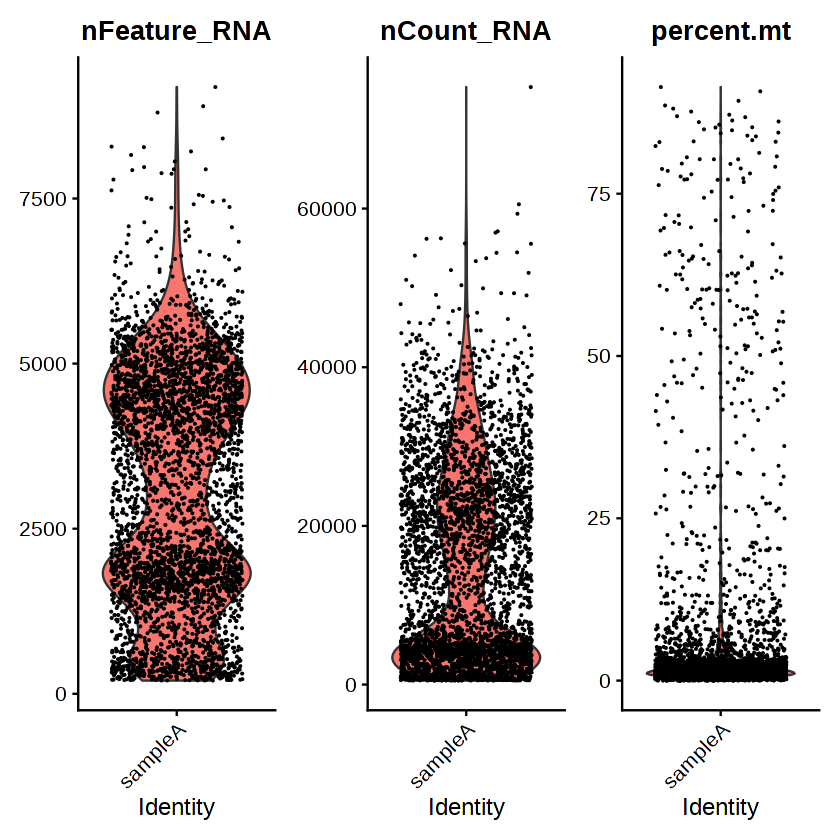

In [21]:
scPlot <- VlnPlot(sampleA, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol=3)
scPlot
#ggsave("01-VlnPlot.png",plot = scPlot, bg = 'white')

One dimensional violin plots are often difficult to interpret the entire distribution so let's try some histograms.  
This is also a demonstration of how to make plots without using Seurat's visualization commands

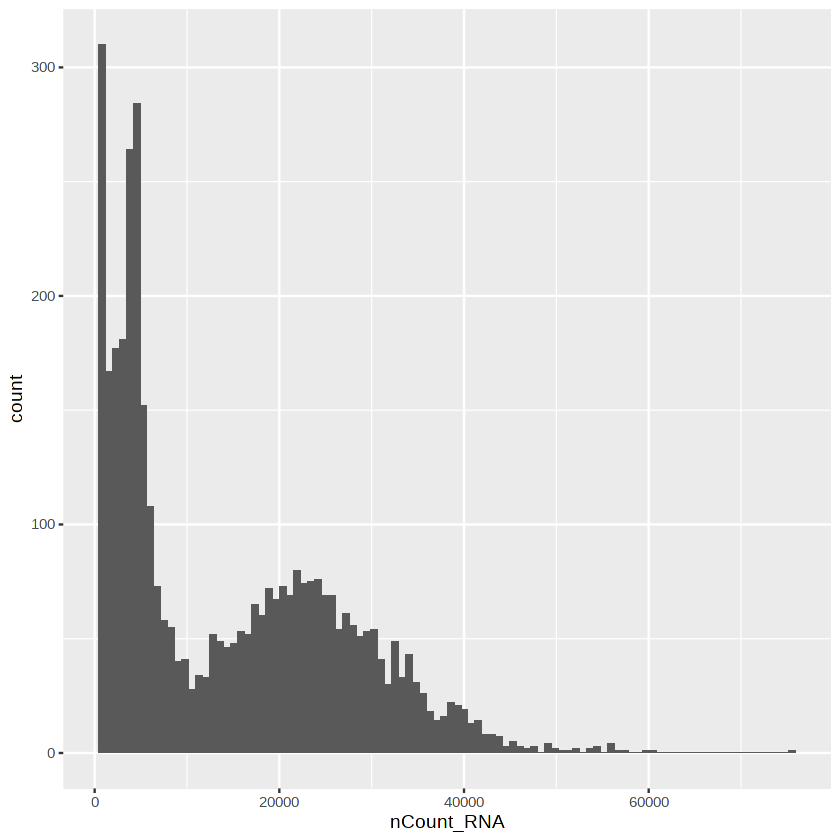

In [22]:
sampleA.qc <- FetchData(sampleA,
                        vars=c("nFeature_RNA","nCount_RNA","percent.mt"))
scPlot <- sampleA.qc %>%
          ggplot() +
          geom_histogram(aes(x=nCount_RNA), bins=100)
scPlot
#ggsave("2-histogram.png",plot = scPlot, bg = 'white')

Try to extract the mean of nCounts_RNA

In [23]:
summary(sampleA.qc$nCount_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    502    3831   11630   14545   23875   75319 

We see very clearly that the typical cell has about 20000 UMIs but this ranges from just a couple tens to over 60000

Let's zoom in on the low count end of the spectrum just to see if we can identify any structure (eg bimodality)

Warning message:
“Removed 3538 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


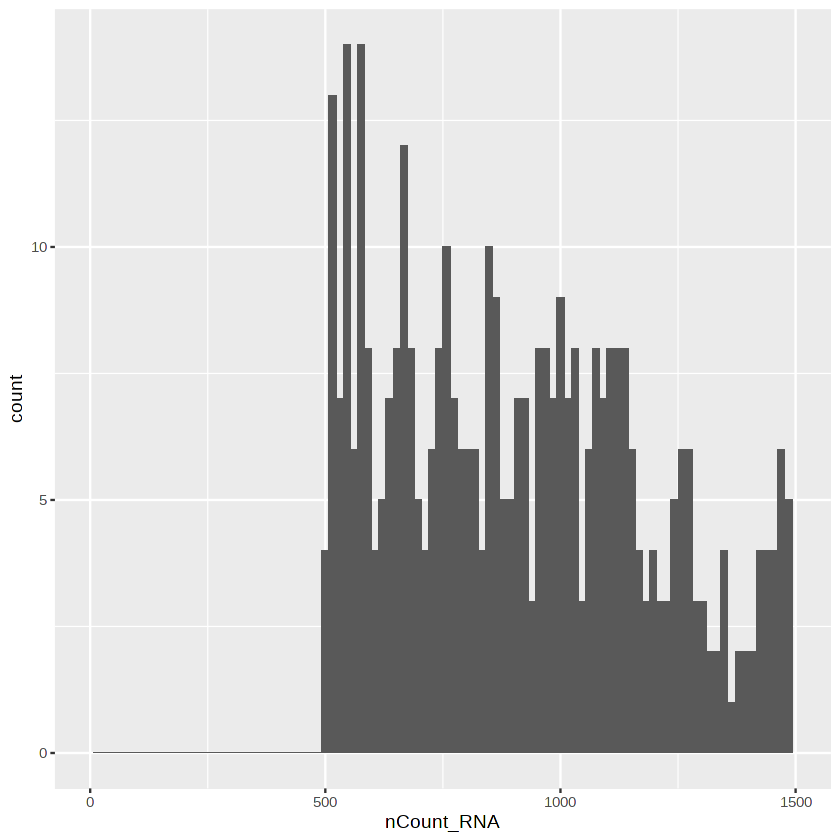

In [24]:
scPlot <- sampleA.qc %>%
          ggplot() +
          geom_histogram(aes(x=nCount_RNA), bins=100) +
          xlim(0,1500)
scPlot
#ggsave("03-histogram.png",plot = scPlot, bg = 'white')

Given the large dynamic range, perhaps a log scale will be useful

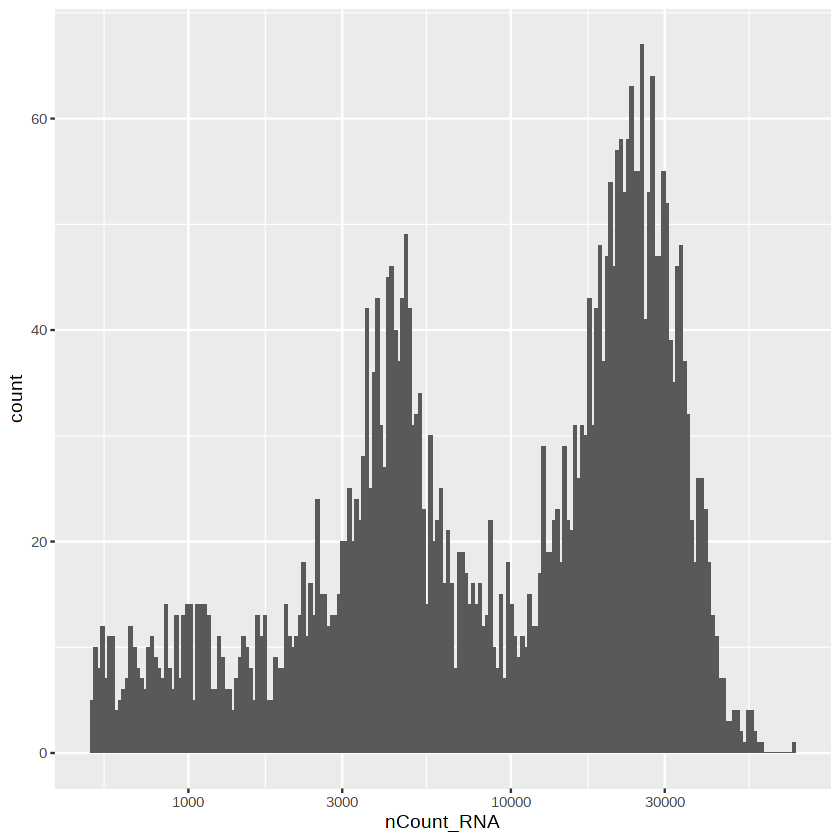

In [25]:
scPlot <- sampleA.qc %>%
          ggplot() +
          geom_histogram(aes(x=nCount_RNA), bins=200) +
          scale_x_log10()
scPlot
#ggsave("04-histogram.png",plot = scPlot, bg = 'white')

Now let's look at the median number of genes per cell

In [26]:
median(sampleA.qc$nFeature_RNA)

[1] 3117

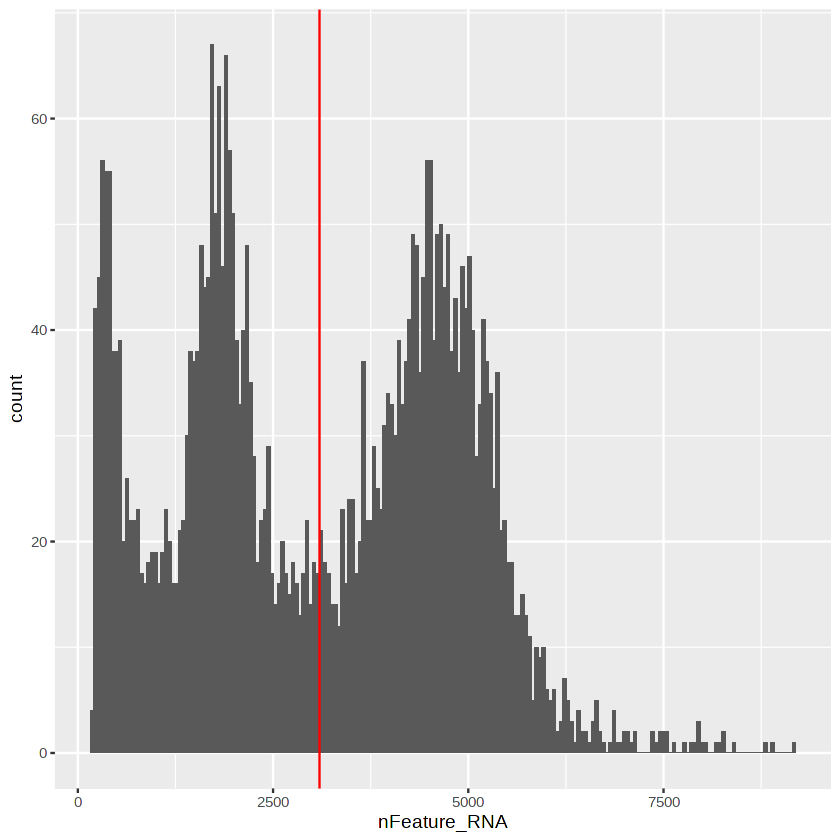

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    200    1672    3117    3091    4591    9188 

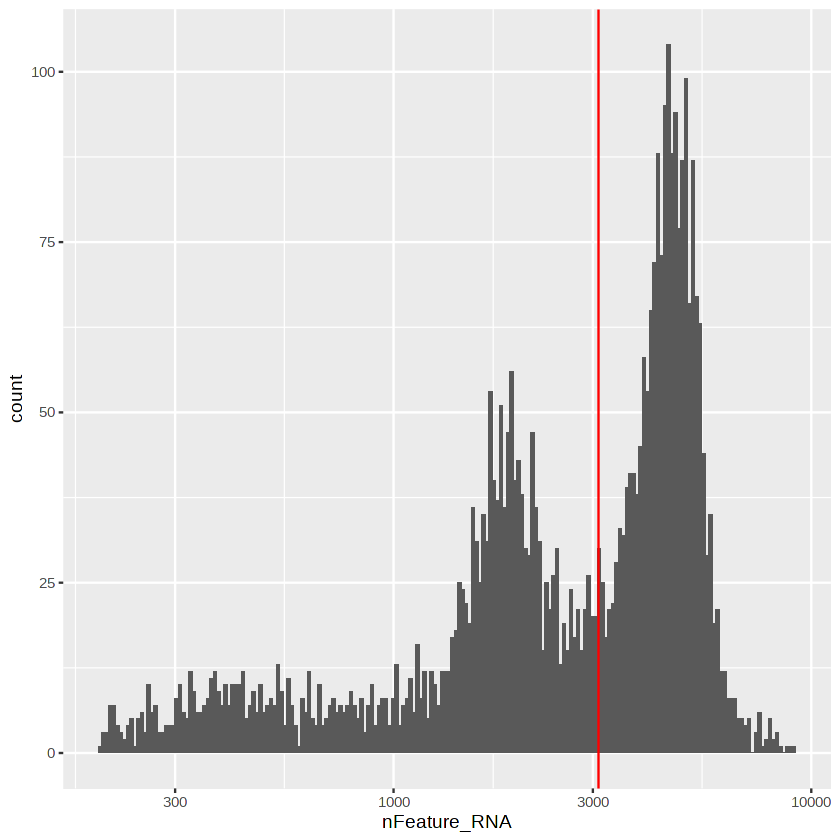

In [27]:
scPlot <- sampleA.qc %>%
    ggplot() +
    geom_histogram(aes(x=nFeature_RNA), bins=200) +
    geom_vline(xintercept = 3096,color="red")
scPlot
#ggsave("05-histogram.png",plot = scPlot, bg = 'white')
scPlot <- sampleA.qc %>%
    ggplot() +
    geom_histogram(aes(x=nFeature_RNA), bins=200) +
    geom_vline(xintercept = 10^(3.491),color="red") +
    scale_x_log10()
scPlot
#ggsave("06-histogram.png",plot = scPlot, bg = 'white')
summary(sampleA.qc$nFeature_RNA)

Looks like the typical cell has data on about 3000 genes, ranging from 200 (the minimum we set when we created the Seurat object) to over 9000

And how about the percentage mitochondrial reads?

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.9796  1.6188  5.7118  2.7733 91.4254 

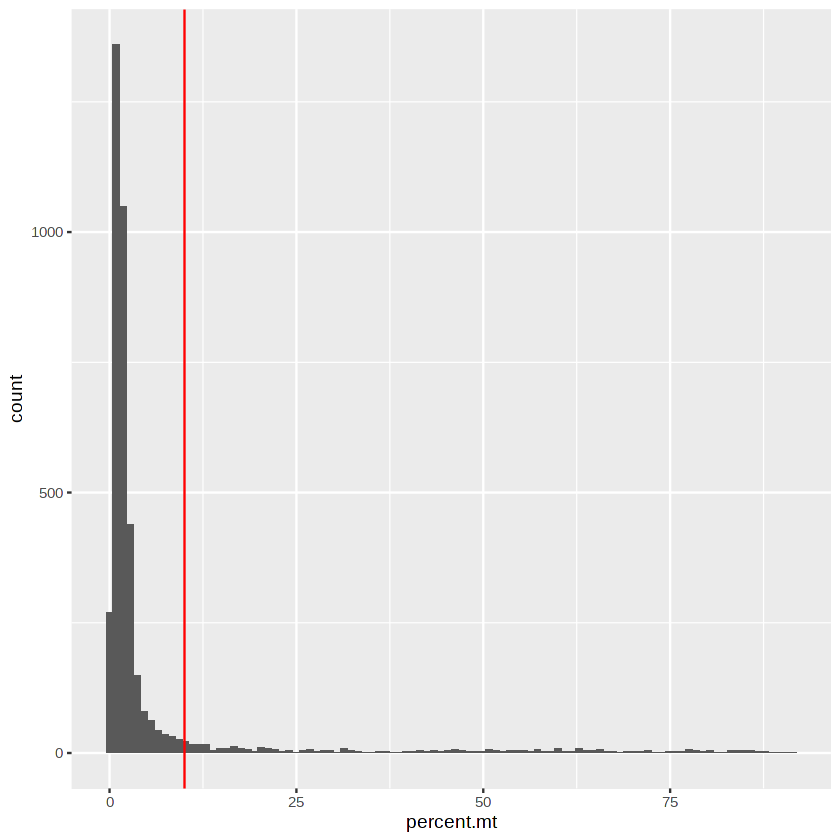

In [28]:
scPlot <- sampleA.qc %>%
          ggplot() +
          geom_histogram(aes(x=percent.mt), bins=100) +
          geom_vline(xintercept = 10,color="red")
scPlot
#ggsave("07-histogram.png",plot = scPlot, bg = 'white')
summary(sampleA.qc$percent.mt)

The majority of cells are below **5%** but some are over **50%**

It is often more useful to look at multiple QC metrics together instead of individually. Lets try some simple 2D scatter plots

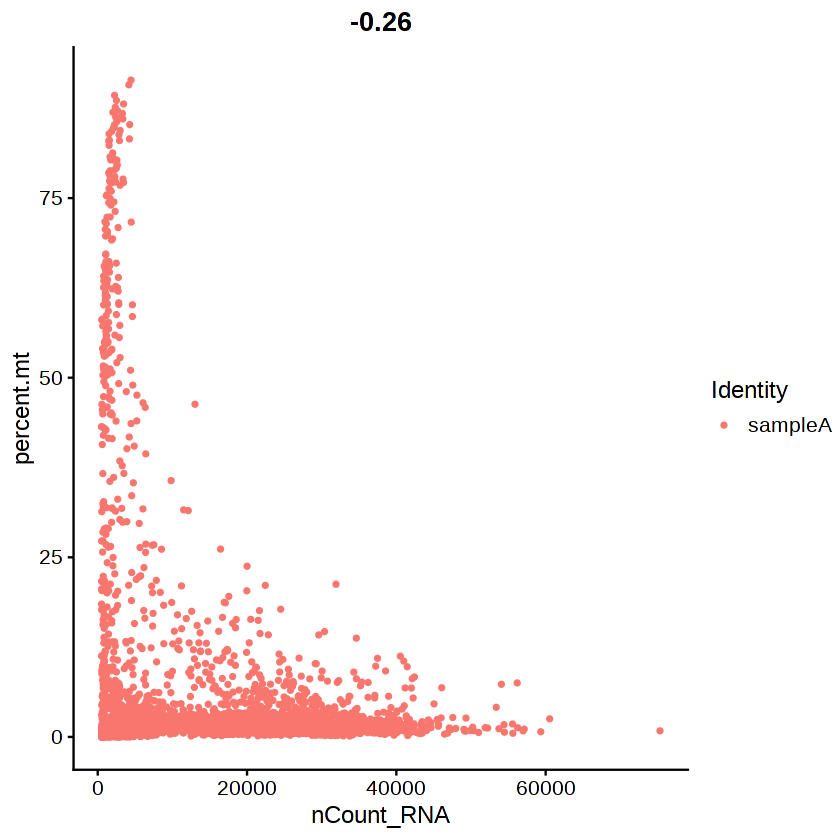

In [29]:
scPlot <- FeatureScatter(sampleA, feature1="nCount_RNA", feature2="percent.mt")
scPlot
#ggsave("08-FeatureScatter.png",plot = scPlot, bg = 'white')

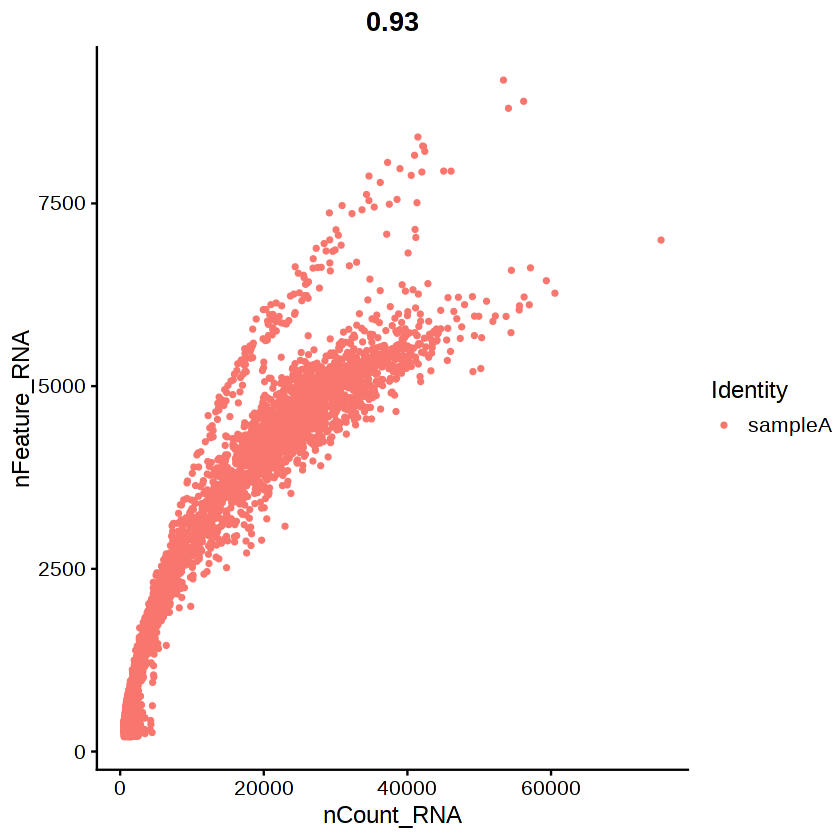

In [30]:
scPlot <- FeatureScatter(sampleA, feature1="nCount_RNA", feature2="nFeature_RNA")
scPlot
#ggsave("09-FeatureScatter.png",plot = scPlot, bg = 'white')

Remeber: we don't need to use only Seurat plotting tools.

ggplot2 is a powerful visualization tool, which handles tables nicely to create plots. Check the plot above (nFeature vs. nCount) and consider that it may be of interest to understand how the data behaves as a function of the percentage of MT reads.

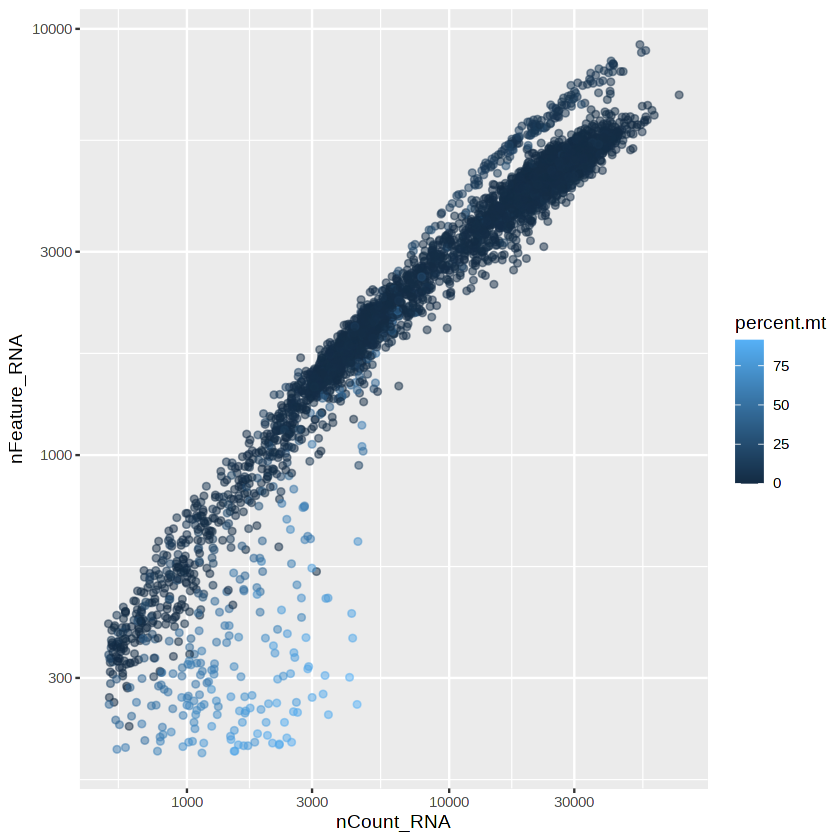

In [31]:
scPlot <- sampleA.qc %>%
          ggplot() +
          geom_point(aes(nCount_RNA, nFeature_RNA, colour=percent.mt), alpha=.50) +
          scale_x_log10() +
          scale_y_log10()
scPlot
#ggsave("10-FeatureScatter.png",plot = scPlot, bg = 'white')

Most of this QC looks quite nice.  We don't see strikingly different subpopulations of cells by these QC metrics.
Just to be safe, let's remove cells with over 10% mitochrondrial reads, which may be a sign of ex-vivo damage during sample handling and library generation  

In [32]:
#Filter using more than one variable
sampleA <- subset(sampleA, nCount_RNA > 500 & nFeature_RNA < 7000 & percent.mt < 10)

Let's reuse the plot we created on the last exercise and create a new column (called keep) using the metadata table. This column will identify the cells that we removed above.

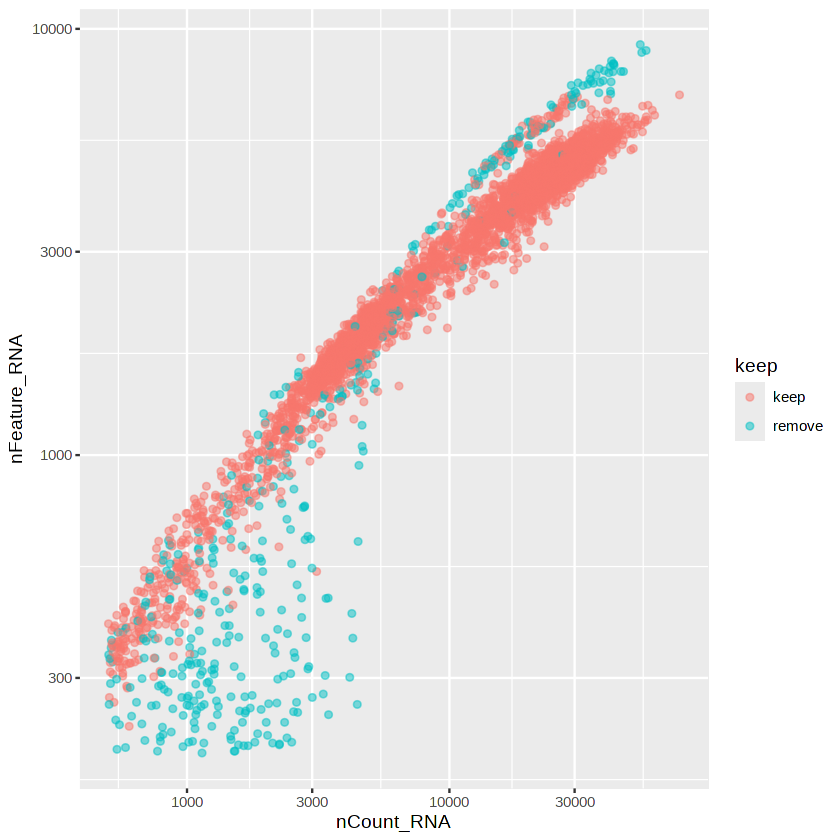

In [33]:
scPlot <- sampleA.qc %>%
          mutate(keep = if_else(nCount_RNA > 500 & nFeature_RNA < 7000 & percent.mt < 10, "keep", "remove")) %>%
          ggplot() +
          geom_point(aes(nCount_RNA, nFeature_RNA, colour=keep), alpha=.50) +
          scale_x_log10() +
          scale_y_log10()
scPlot
#ggsave("11-point.png",plot = scPlot, bg = 'white')

[1] 33539  6249
[1] 20271  3527


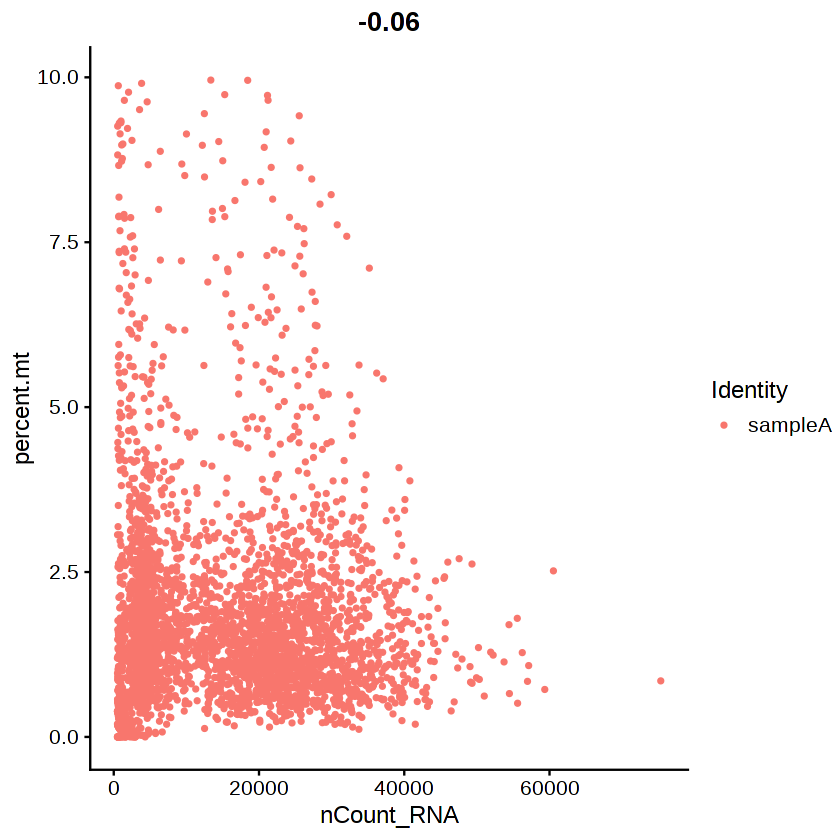

In [34]:
#sampleA <- subset(sampleA, subset = percent.mt < 10)
scPlot <- FeatureScatter(sampleA, feature1="nCount_RNA", feature2="percent.mt")
scPlot
#ggsave("12-FeatureScatter.png",plot = scPlot, bg = 'white')
print(dim(sc))
print(dim(sampleA))


##Identify variable genes
To get a feel for the patterns of gene expression change across cells, let's start exploring some visualizations

The first step is to identify the most variable genes across the dataset.
Genes that don't vary across cells probably won't contribute much to downstream analyses, so we will focus on the top 2000 most variable genes here.
First we will apply a variance stablizing transformation (vst) to model the mean/variance relationship

In [35]:
sampleA <- FindVariableFeatures(sampleA, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts



Let's see the names of the most highly variable genes now

In [36]:
top10 <- head(VariableFeatures(sampleA), 10)
top10

[1] "CAPS"     "C20orf85" "GSTA1"    "C9orf24"  "IGFBP7"   "C2orf40" 
 [7] "SAA1"     "LCN2"     "HAMP"     "MT1G"

Now let's plot the variance (after vst) versus the mean of expression for each gene, coloring the top 2000 and labelling the top 10

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


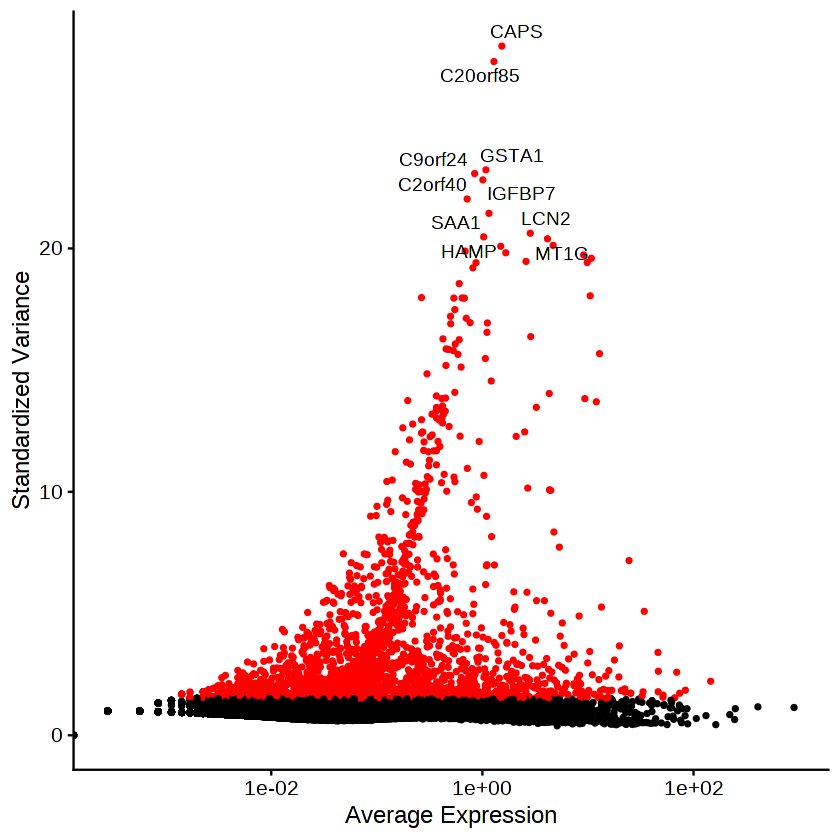

In [37]:
plot1 <- VariableFeaturePlot(sampleA)
scPlot <- LabelPoints(plot=plot1, points = top10, repel=T, xnudge=0, ynudge=0) + theme(legend.position="none")
scPlot
#ggsave("13-VariableFeaturePlot.png",plot = scPlot, bg = 'white')

##Scaling gene expression
The next step is to scale the expression of each gene to have an average expression over cells of 0 and a variance of 1. This type of linear transformation is commonly applied in many big data domains to allow feautures (eg genes) with different magnitudes (eg expression levels) to contribute equally to downstream analyses. In Seurat, the results of this transformation don't overwrite the unscaled expression values, instead they are stored in sampleA[["RNA"]]@scale.data

scale the data

In [38]:
sampleA = NormalizeData(sampleA)
all.genes <- rownames(sampleA)
sampleA <- ScaleData(sampleA, features = all.genes)

Normalizing layer: counts

Centering and scaling data matrix



In [39]:
sampleA[["RNA"]]$data[1:10,1:10]

  [[ suppressing 10 column names ‘AAACCTGAGATGTCGG-1’, ‘AAACCTGAGGCTCATT-1’, ‘AAACCTGCAATCCGAT-1’ ... ]]



10 x 10 sparse Matrix of class "dgCMatrix"
                                     
AL627309.1 . .        . . . . . . . .
AL669831.2 . .        . . . . . . . .
AL669831.5 . .        . . . . . . . .
FAM87B     . .        . . . . . . . .
LINC00115  . .        . . . . . . . .
FAM41C     . .        . . . . . . . .
SAMD11     . .        . . . . . . . .
NOC2L      . 0.262325 . . . . . . . .
KLHL17     . .        . . . . . . . .
PLEKHN1    . .        . . . . . . . .

# Dimension Reduction

##PCA
We've identified highly variable genes and equalized the scale of different genes. Now let's do our first dimensionality reduction and visualization, PCA.

perform PCA

PC_ 1 
Positive:  CTSC, CD52, CD68, SNX10, ACP5, IFI30, FABP5, CXCL10, APOC1, NCF1 
	   RSAD2, BCL2A1, PLEK, FCGR3A, C1QC, LYZ, MS4A6A, C1QB, MS4A4A, C1QA 
	   TUBB, SERPINA1, GPNMB, SOCS1, FCGR1A, APOE, PLAUR, CD69, IL1RN, MAFB 
Negative:  LRRIQ1, EFCAB1, DMKN, CFAP43, FAM183A, NME5, SAXO2, MS4A8, SNTN, RSPH4A 
	   DNAH10, RSPH1, FAM92B, CDHR3, NWD1, HYDIN, TPPP3, ROPN1L, STOML3, LDLRAD1 
	   CAPSL, DNAH12, DCDC2B, AKAP14, MORN5, DNAI1, C1orf194, C9orf24, CCDC17, FOXJ1 
PC_ 2 
Positive:  IL32, CD3E, PTPRCAP, CD2, CORO1A, CCL5, CD3D, CLEC2D, LCK, LIMD2 
	   CD7, CD3G, NKG7, TRBC2, GIMAP7, GZMA, CD247, CD8A, PRF1, TRAC 
	   SEPT1, CST7, CD96, CD8B, CD48, SPOCK2, ANXA6, IKZF3, CXCR3, IL2RB 
Negative:  CD68, SERPING1, SERPINA1, IFI30, CTSB, MS4A4A, LYZ, APOC1, FCGR3A, C1QB 
	   C1QC, C1QA, HLA-DRB5, NUPR1, GPNMB, FCGR1A, CTSZ, CTSL, MARCO, CYP27A1 
	   ALDH2, HLA-DQA2, CFD, CD163, APOE, MS4A6A, S100A9, HLA-DQB1, SNX10, PLAUR 
PC_ 3 
Positive:  CD52, FGF14, MORN5, ARMC4, LINC01571, C11orf9

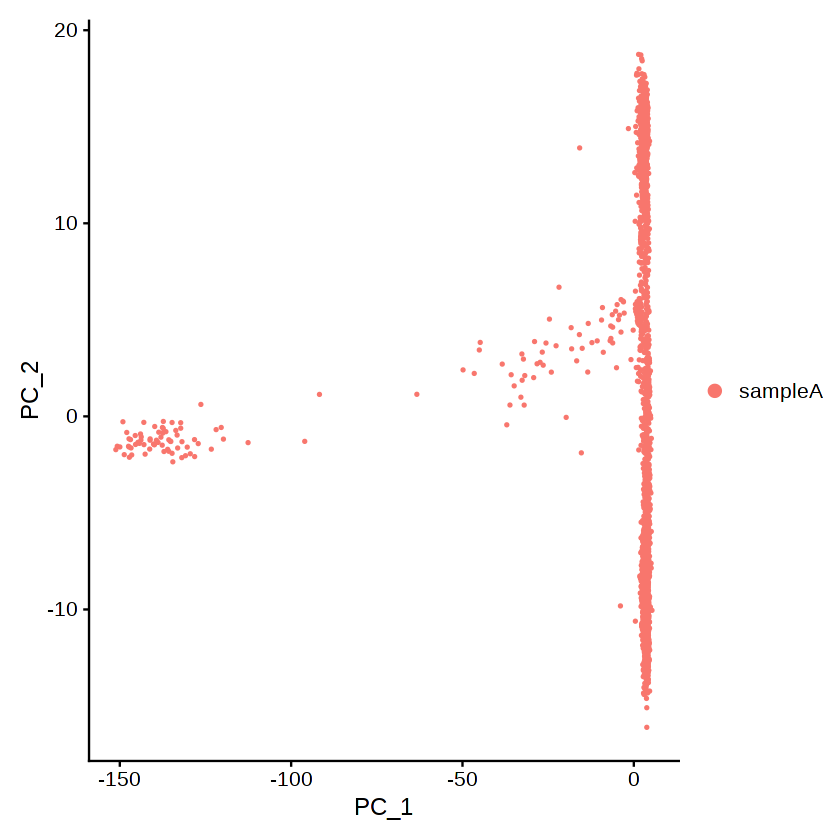

In [40]:
sampleA <- RunPCA(sampleA, features = VariableFeatures(sampleA))
scPlot <- DimPlot(sampleA, reduction="pca")
scPlot
#ggsave("14-DimPlot.png",plot = scPlot, bg = 'white')

Hmm, that doesn't show much structure.  It seems like the vast majority of the variation across cells is coming from one direction in gene expression space.
Maybe we can learn something by looking at what genes contribute to that PC.


The explained variance by each principal component is the ratio between each eigenvalue and the sum of all eigenvalues. We need to remember that Seurat does not compute all the principal components, because it is computationally heavy. In our case, it calculated the first 50 PCs, so all the inference must be conditional on these 50 PCs (and not all the 3894 possible PCs).

PC percVar    cumulVar
1  1  25.1784623 25.17846
2  2   7.0905486 32.26901
3  3   2.9814312 35.25044
4  4   2.1811711 37.43161
5  5   1.3919137 38.82353
6  6   1.2503835 40.07391
7  7   0.9701660 41.04408
8  8   0.7932176 41.83729
9  9   0.6811116 42.51841
10 10  0.6392709 43.15768
11 11  0.6243779 43.78205
12 12  0.4851001 44.26715
13 13  0.4537440 44.72090
14 14  0.4247329 45.14563
15 15  0.3955625 45.54119
16 16  0.3522700 45.89346
17 17  0.3225127 46.21598
18 18  0.3024528 46.51843
19 19  0.2765169 46.79495
20 20  0.2705247 47.06547

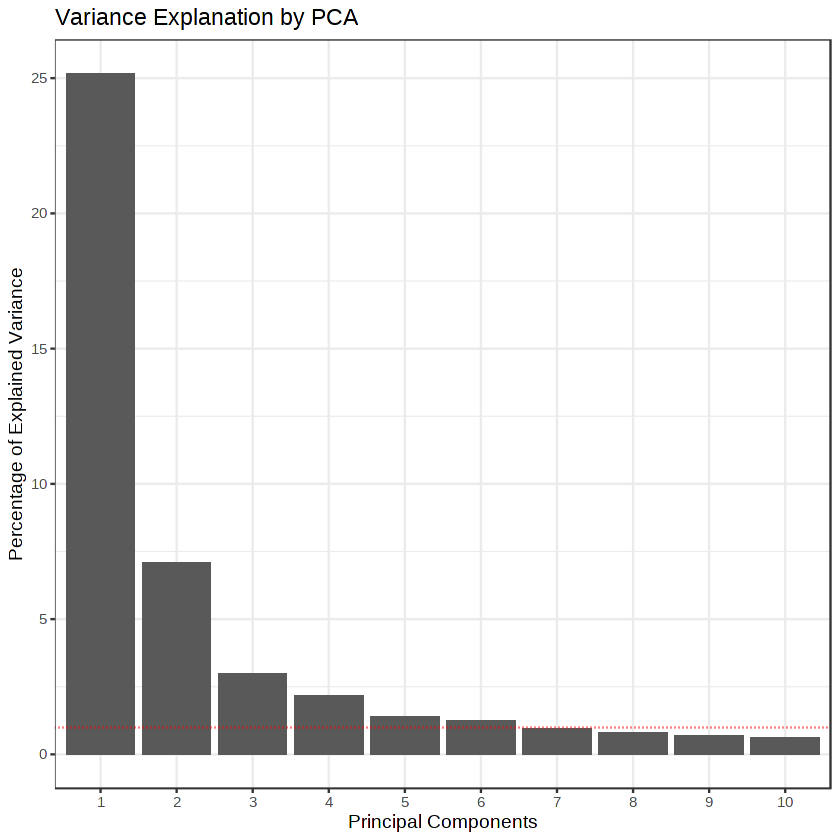

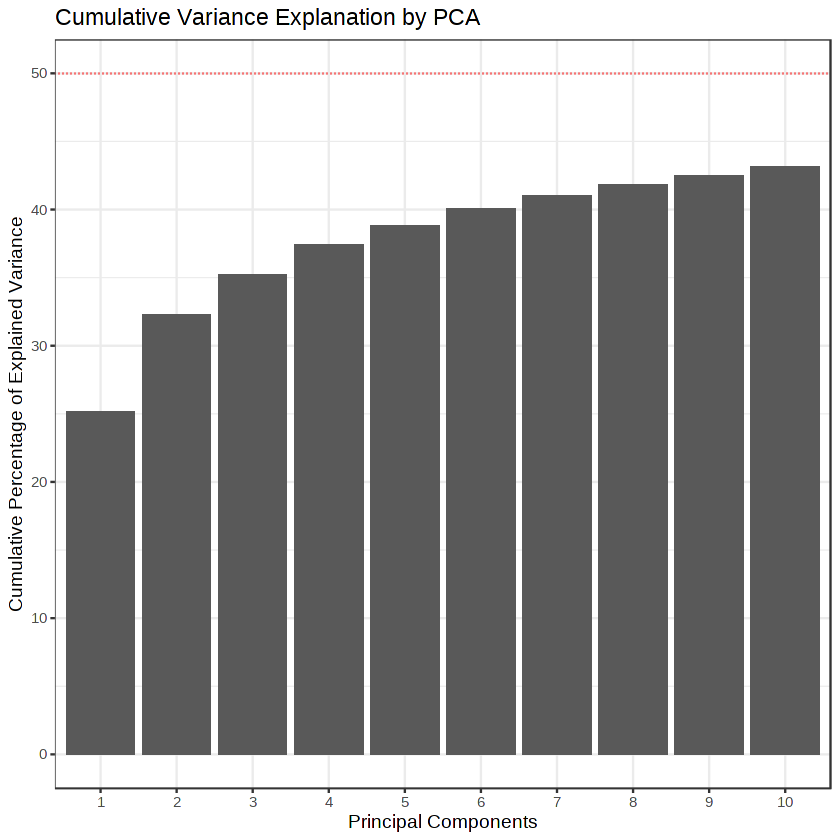

In [41]:
pca = sampleA[["pca"]]

## get the eigenvalues
evs = pca@stdev^2
total.var = pca@misc$total.variance
varExplained = evs/total.var
pca.data = data.frame(PC=factor(1:length(evs)),
                      percVar=varExplained*100)
pca.data$cumulVar = cumsum(pca.data$percVar)

head(pca.data, 20)

scPlot <- pca.data[1:10,] %>%
          ggplot(aes(x=PC, y=percVar)) +
          geom_bar(stat='identity') +
          geom_hline(yintercept = 1, colour="red", linetype=3) +
          labs(title="Variance Explanation by PCA") +
          xlab("Principal Components") +
          ylab("Percentage of Explained Variance") +
          theme_bw()
scPlot
#ggsave("15-geom_bar.png",plot = scPlot, bg = 'white')

scPlot <- pca.data[1:10,] %>%
          ggplot(aes(x=PC, y=cumulVar)) +
          geom_bar(stat='identity') +
          geom_hline(yintercept = 50, colour="red", linetype=3) +
          labs(title="Cumulative Variance Explanation by PCA") +
          xlab("Principal Components") +
          ylab("Cumulative Percentage of Explained Variance") +
          theme_bw()
scPlot
#ggsave("16-geom_bar.png",plot = scPlot, bg = 'white')

Observing PC1, it seems that it is account for the overall signal per cell. We can't see clear groups of different gene sets (unlike PC2).

[ ]


The other PCs instead do seem to be measuring the relative expression of different genes. If PC1 is just the total signal per cell maybe we can visualize that directly.

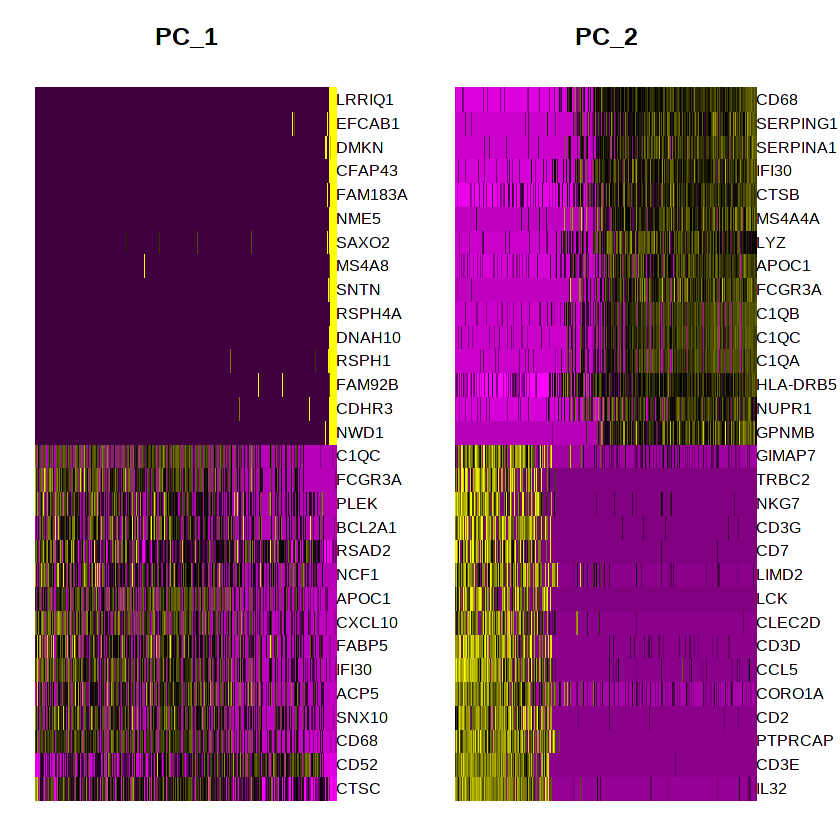

In [42]:
#png("17-DimHeatmap.png", res= 300, height = 1920, width = 1920)
DimHeatmap(sampleA, dims = 1:2)
#dev.off()

Calculate the variance for each component to find an explanation

It appears that **PC1** just has postive weights from a bunch of genes.  This suggests it isn't balancing expression of different gene sets, it's just measuring overall signal.  What do other PCs look like?

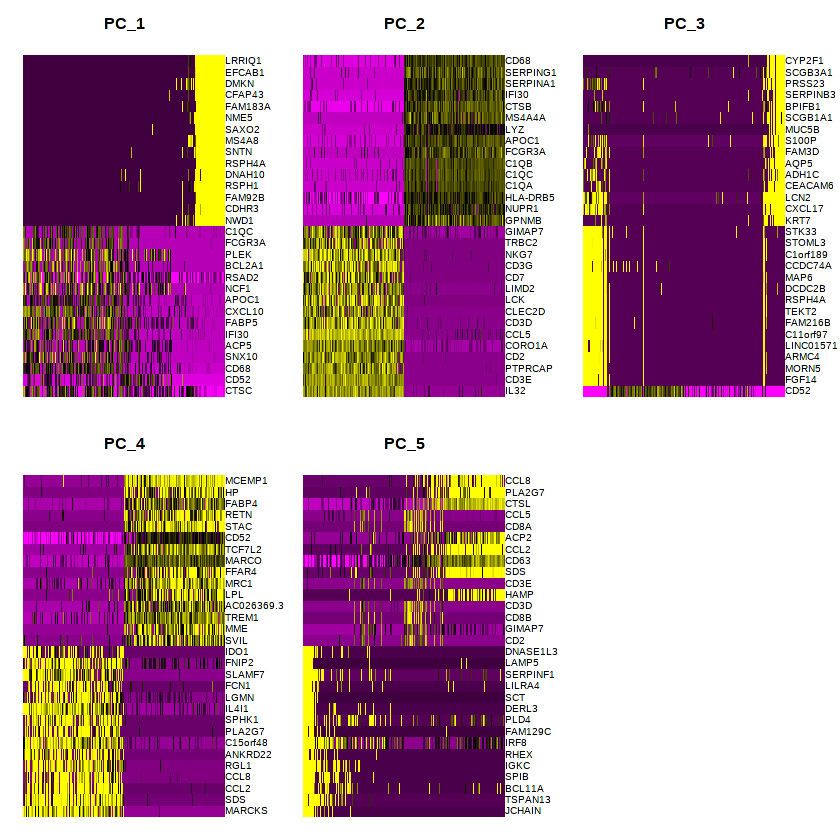

In [43]:
#png("18-DimHeatmap.png", res= 300, height = 1920, width = 1920)
DimHeatmap(sampleA, dims = 1:5, cells = 500, balanced=T)
#dev.off()

The other PCs instead do seem to be measuring the relative expression of
different genes. If PC1 is just the total signal per cell maybe we can
visualize that directly.

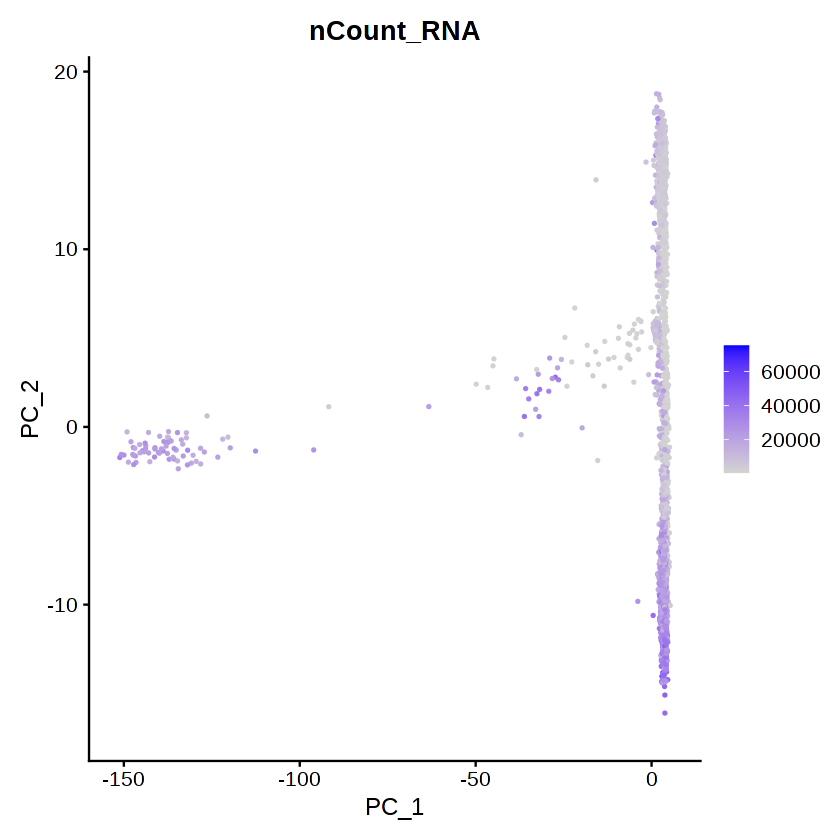

In [44]:
scPlot <- FeaturePlot(sampleA, features="nCount_RNA")
scPlot
#ggsave("19-FeaturePlot.png",plot = scPlot, bg = 'white')

That definitely seems to be the case.  In fact, it is not surprising because we saw that there was a huge variation in the total RNA per cell in our QC and we never corrected for it.

To address this, we'll take a common and straightforward approach of dividing the counts for each gene by the total UMI for that cell and then take a log transformation.  
In truth, we will also multiply by a scaling factor of 10,000 before the log transformation. That is arbitrary and not particularly important but is common practice.


In [45]:
sampleA = NormalizeData(sampleA, normalization.method="LogNormalize",
                        scale.factor=10000)

Normalizing layer: counts



Now we have to re-identify highly variable features and re-scale

In [46]:
sampleA = FindVariableFeatures(sampleA, selection.method="vst",
                               nfeatures=2000)
top10 = head(VariableFeatures(sampleA), 10)
top10

Finding variable features for layer counts



[1] "CAPS"     "C20orf85" "GSTA1"    "C9orf24"  "IGFBP7"   "C2orf40" 
 [7] "SAA1"     "LCN2"     "HAMP"     "MT1G"

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


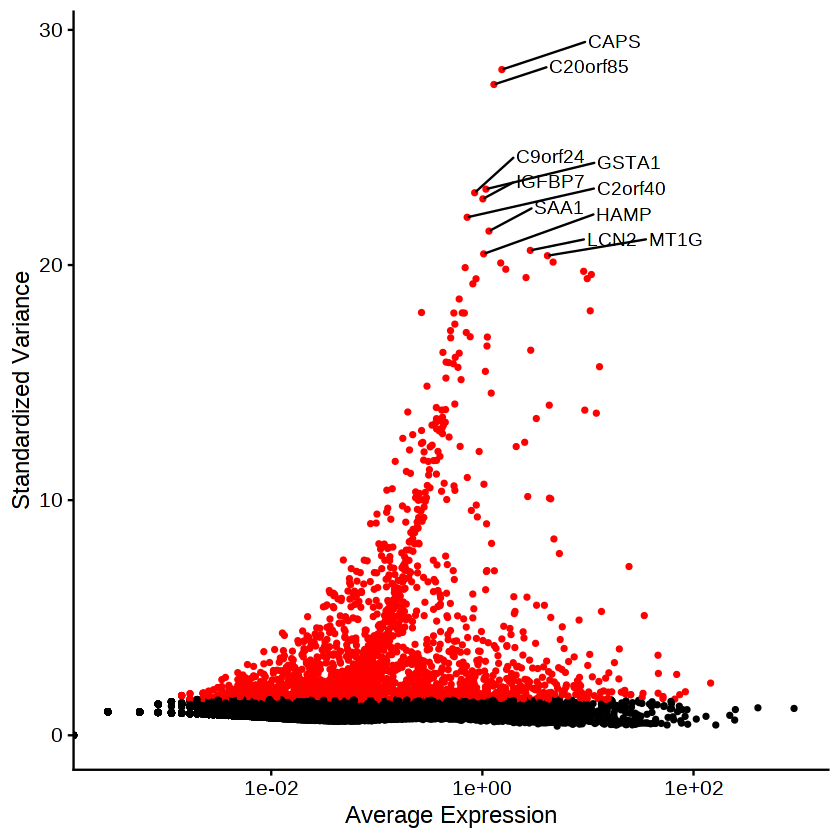

In [47]:
plot1 = VariableFeaturePlot(sampleA)
scPlot <- LabelPoints(plot=plot1, points=top10, repel=TRUE, xnudge=1, ynudge=1) +
          theme(legend.position="none")
scPlot
#ggsave("20-VariableFeaturePlot.png",plot = scPlot, bg = 'white')

Centering and scaling data matrix

PC_ 1 
Positive:  CTSC, CD52, CD68, SNX10, ACP5, IFI30, FABP5, CXCL10, APOC1, NCF1 
	   RSAD2, BCL2A1, PLEK, FCGR3A, C1QC, LYZ, MS4A6A, C1QB, MS4A4A, C1QA 
	   TUBB, SERPINA1, GPNMB, SOCS1, FCGR1A, APOE, PLAUR, CD69, IL1RN, MAFB 
Negative:  LRRIQ1, EFCAB1, DMKN, CFAP43, FAM183A, NME5, SAXO2, MS4A8, SNTN, RSPH4A 
	   DNAH10, RSPH1, FAM92B, CDHR3, NWD1, HYDIN, TPPP3, ROPN1L, STOML3, LDLRAD1 
	   CAPSL, DNAH12, DCDC2B, AKAP14, MORN5, DNAI1, C1orf194, C9orf24, CCDC17, FOXJ1 
PC_ 2 
Positive:  IL32, CD3E, PTPRCAP, CD2, CORO1A, CCL5, CD3D, CLEC2D, LCK, LIMD2 
	   CD7, CD3G, NKG7, TRBC2, GIMAP7, GZMA, CD247, CD8A, PRF1, TRAC 
	   SEPT1, CST7, CD96, CD8B, CD48, SPOCK2, ANXA6, IKZF3, CXCR3, IL2RB 
Negative:  CD68, SERPING1, SERPINA1, IFI30, CTSB, MS4A4A, LYZ, APOC1, FCGR3A, C1QB 
	   C1QC, C1QA, HLA-DRB5, NUPR1, GPNMB, FCGR1A, CTSZ, CTSL, MARCO, CYP27A1 
	   ALDH2, HLA-DQA2, CFD, CD163, APOE, MS4A6A, S100A9, HLA-DQB1, SNX10, PLAUR 
PC_ 3 
Positive:  CD52, FGF1

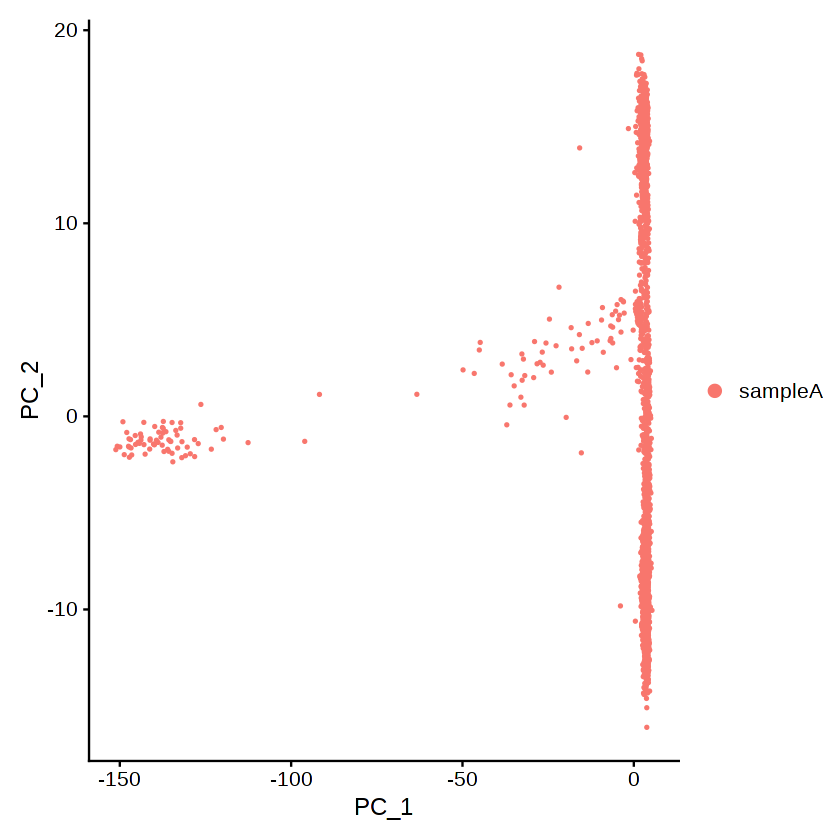

In [48]:
sampleA <- ScaleData(sampleA, features = all.genes)
# perform PCA
sampleA <- RunPCA(sampleA, features = VariableFeatures(sampleA))
scPlot <- DimPlot(sampleA, reduction="pca")
scPlot
#ggsave("21-DimPlot.png",plot = scPlot, bg = 'white')

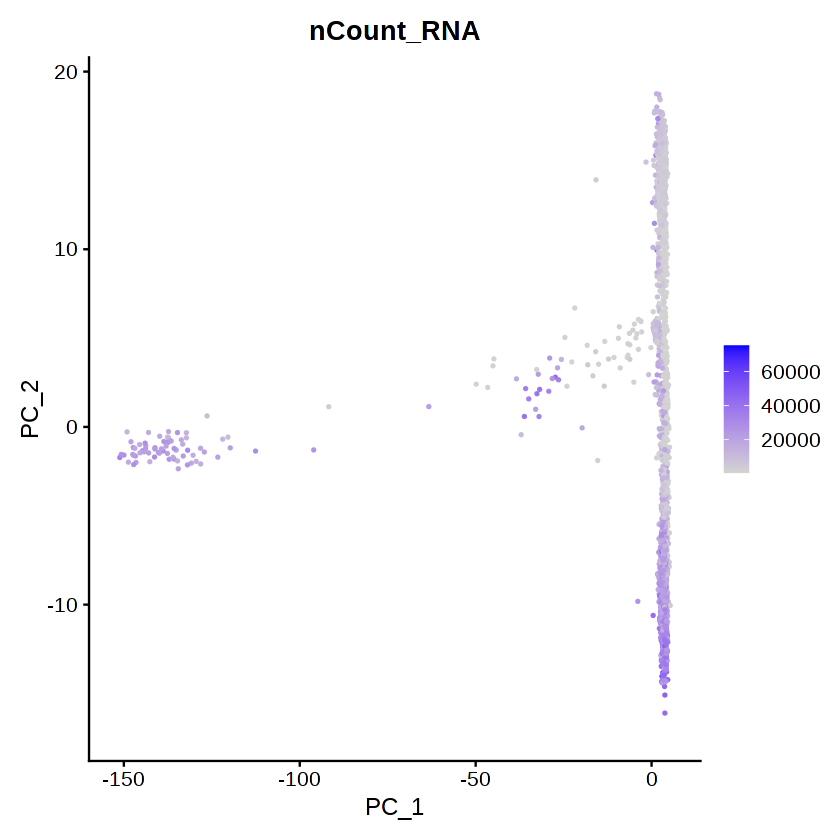

In [49]:
scPlot <- FeaturePlot(sampleA, features="nCount_RNA")
scPlot
#ggsave("22-FeaturePlot.png",plot = scPlot, bg = 'white')

It doesn't look better, but that is, can you play to improve it?

##UMAP
PCA has both the bug and the feature that it is a linear transformation. That's a feature in so far as it is easily interpretable/meaningful. It's a bug however because it is limiting for visualization. Uniform Manifold Approximation and Projection (UMAP) is a relatively recently developed nonlinear approach that has gained widespread use in the single cell community. Let's check it out.

While we can calculate UMAP using the full original dimensional space, it can be useful to do some initial dimensionality reduction via PCA. This will both speed up our calculations and, hopefully, remove noise from the distance metrics.

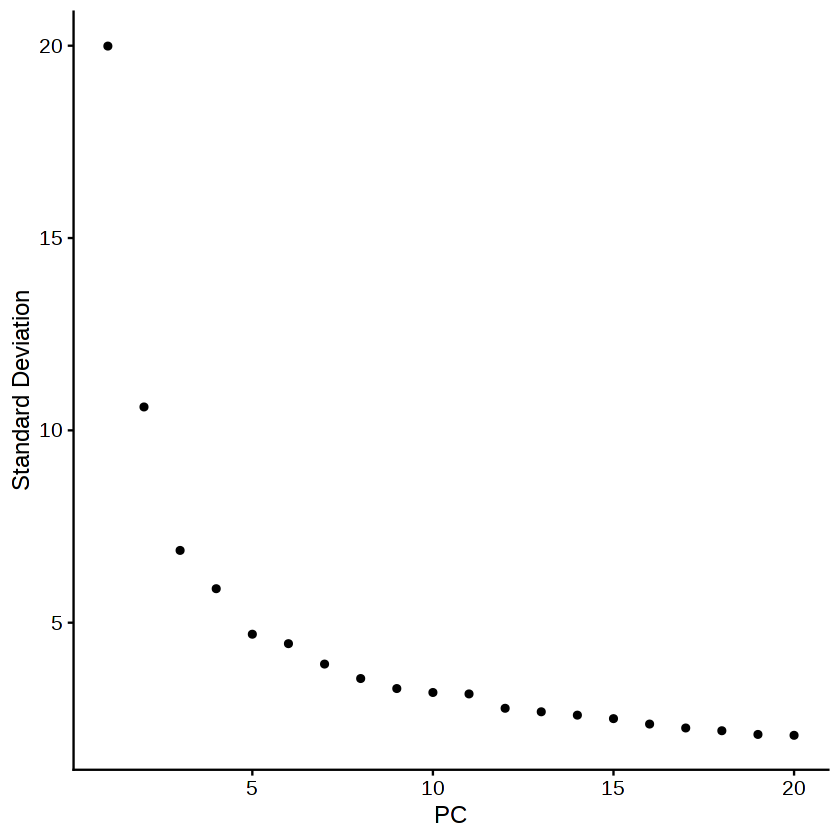

In [50]:
# To use PCA for dimensionality reduction we have to choose how many principal
# components to use.
# Since PCA is linear and orthogonal, the PC values are straightforward to interpret
# as explaining a fraction of the total variation across the data.
# Let's look at the top PCs.
scPlot <- ElbowPlot(sampleA)
scPlot
#ggsave("23-ElbowPlot.png",plot = scPlot, bg = 'white')

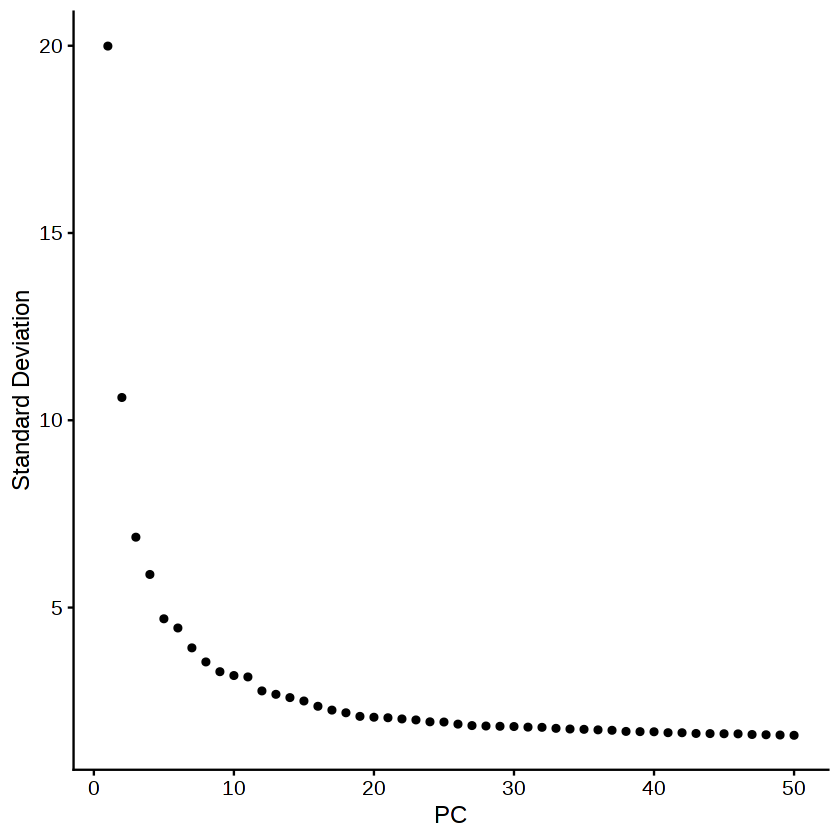

In [51]:
# By default we see the top 20 but we can ask for more if we like.
scPlot <- ElbowPlot(sampleA, ndims=50)
scPlot
#ggsave("24-ElbowPlot.png",plot = scPlot, bg = 'white')

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


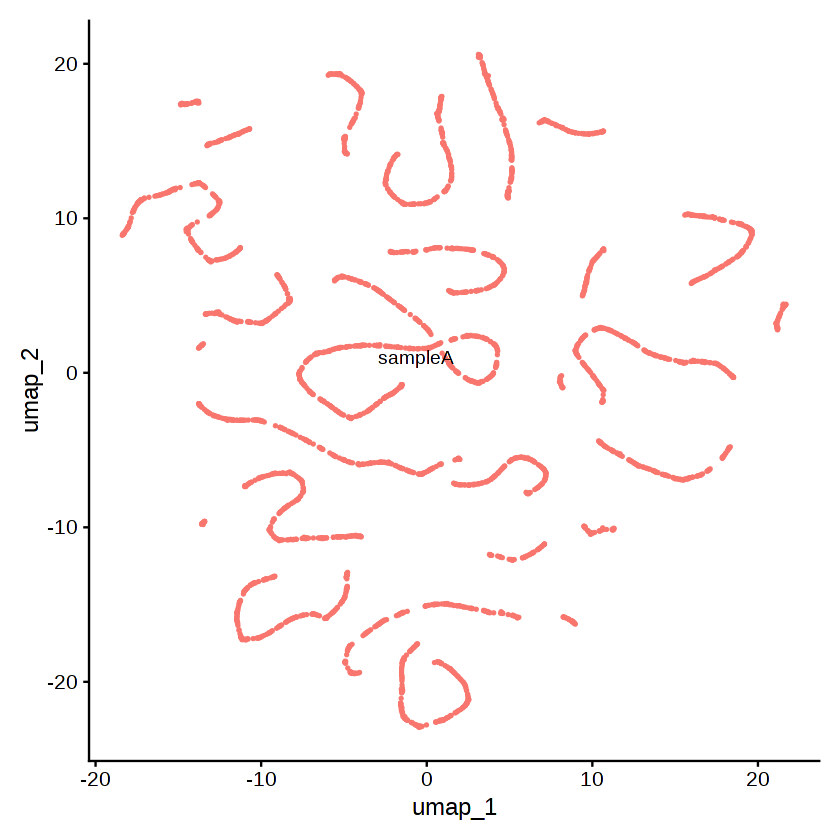

In [52]:
# Note that the previous RunPCA only calculated the top 50.  If we want to look
# at more principal component values, we have to calculate them first.  We could go
# back and re-run the PCA but for the sake of time let's just use the top 50

# While there's no clear cutoff (there rarely is), it doesn't look like all top
# 50 will be essential.  Our calculations will of course be quickest if we only
# use 2 PCs, let's see what effect that has.
sampleA <- RunUMAP(sampleA, dims=1:2, verbose=F)
scPlot <- DimPlot(sampleA, label=T) + NoLegend()
scPlot
#ggsave("25-DimPlot.png",plot = scPlot, bg = 'white')

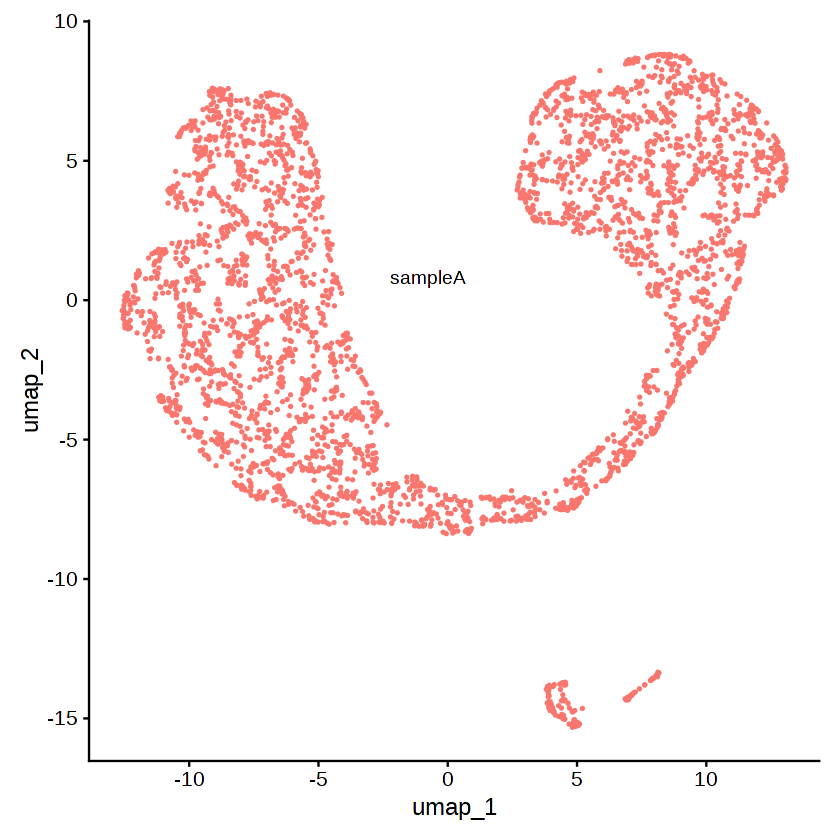

In [53]:
# That seems suspicious.  It doesn't at all match our expectations about gene expression
# profiles of PBMC subsets should look like.  Let's see if it is a robust pattern, of if
# it changes a lot when we add just one more PC.

sampleA <- RunUMAP(sampleA, dims=1:3, verbose=F)
scPlot <- DimPlot(sampleA, label=T) + NoLegend()
scPlot
#ggsave("26-DimPlot.png",plot = scPlot, bg = 'white')

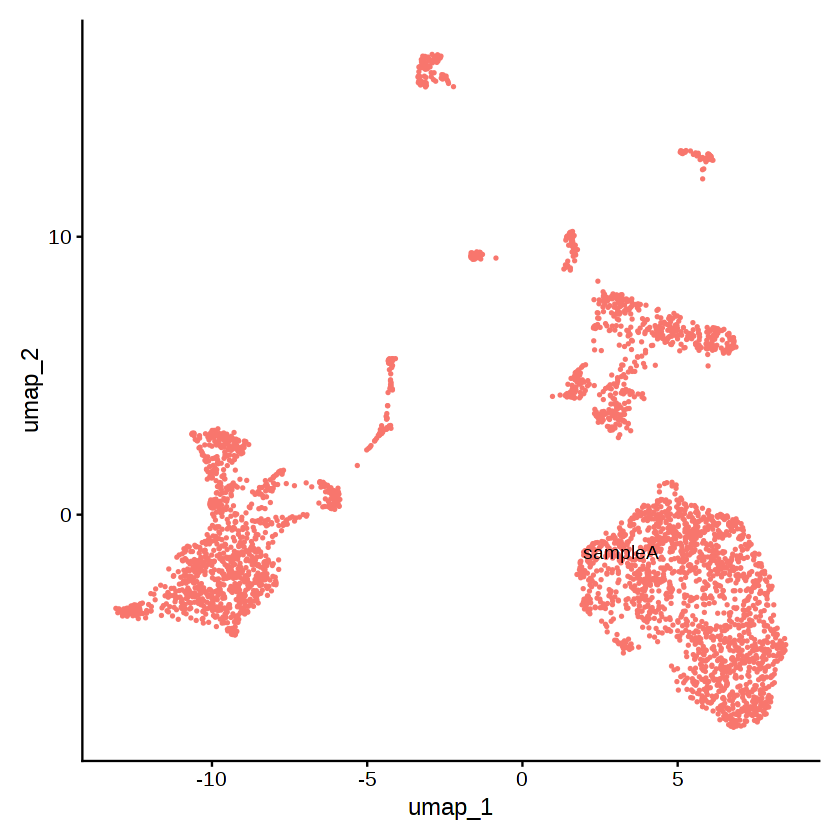

In [54]:
# Indeed, it changed quite a bit!  It still doesn't really match what we might expect
# for PBMCs.  Furthermore, the plot of PC values above doesn't plateau until somewhere
# in the 10-20 range.  Let's use the top 15.

sampleA <- RunUMAP(sampleA, dims=1:15, verbose=F)
scPlot <- DimPlot(sampleA, label=T) + NoLegend()
scPlot
#ggsave("26-DimPlot.png",plot = scPlot, bg = 'white')

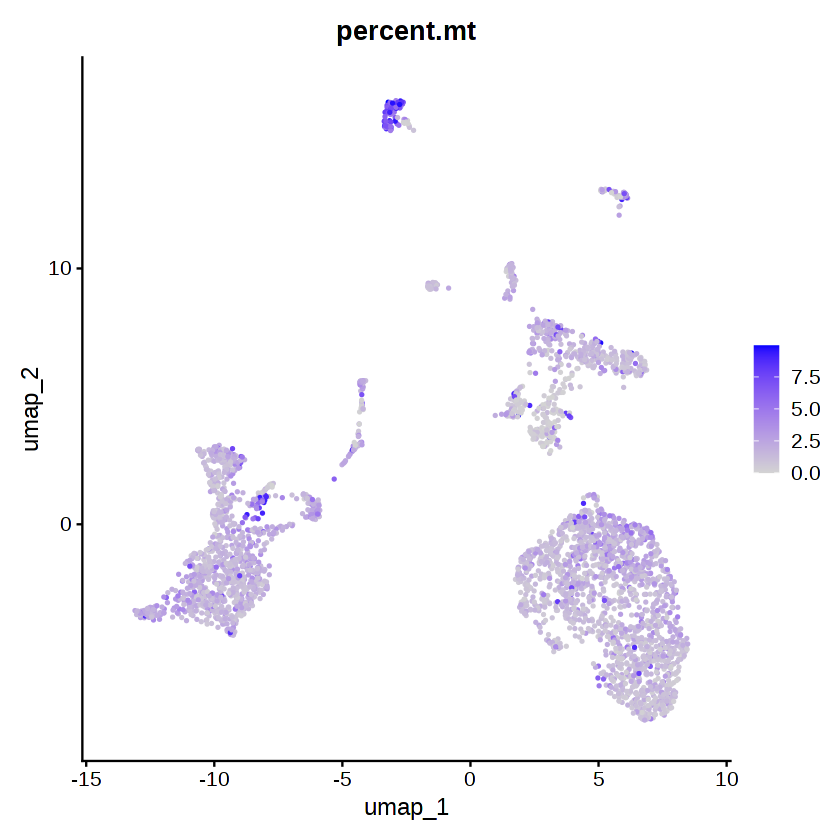

In [55]:
# Some nice clusters!  First let's make sure none of them are driven by QC artifacts.

scPlot <- FeaturePlot(sampleA, features=c("percent.mt"))
scPlot
#ggsave("25-FeaturePlot.png",plot = scPlot, bg = 'white')

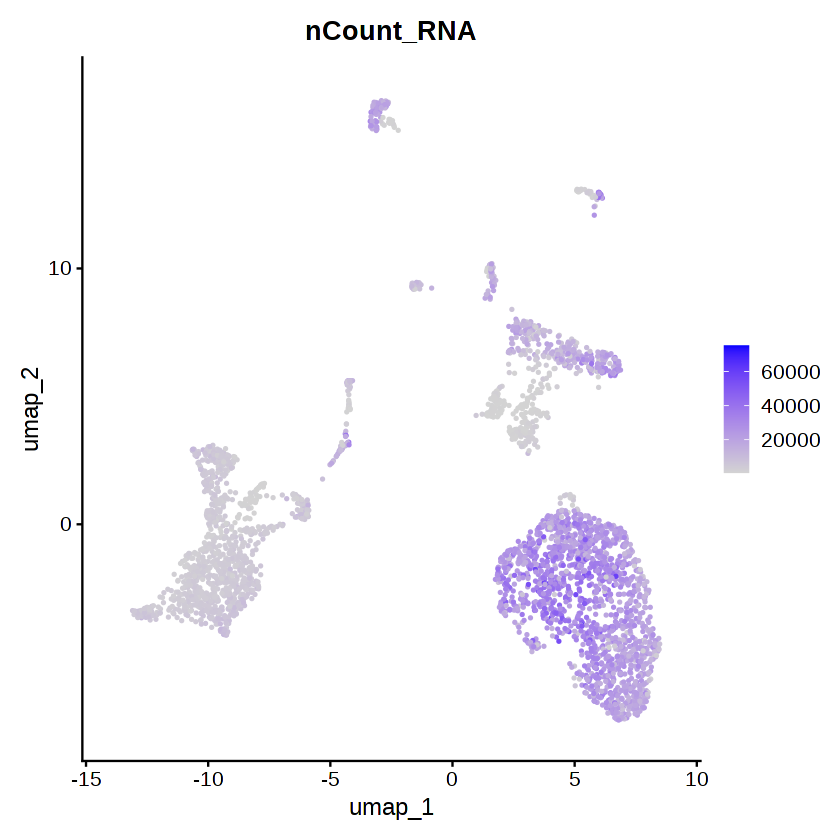

In [56]:
scPlot <- FeaturePlot(sampleA, features=c("nCount_RNA"))
scPlot
#ggsave("26-FeaturePlot.png",plot = scPlot, bg = 'white')

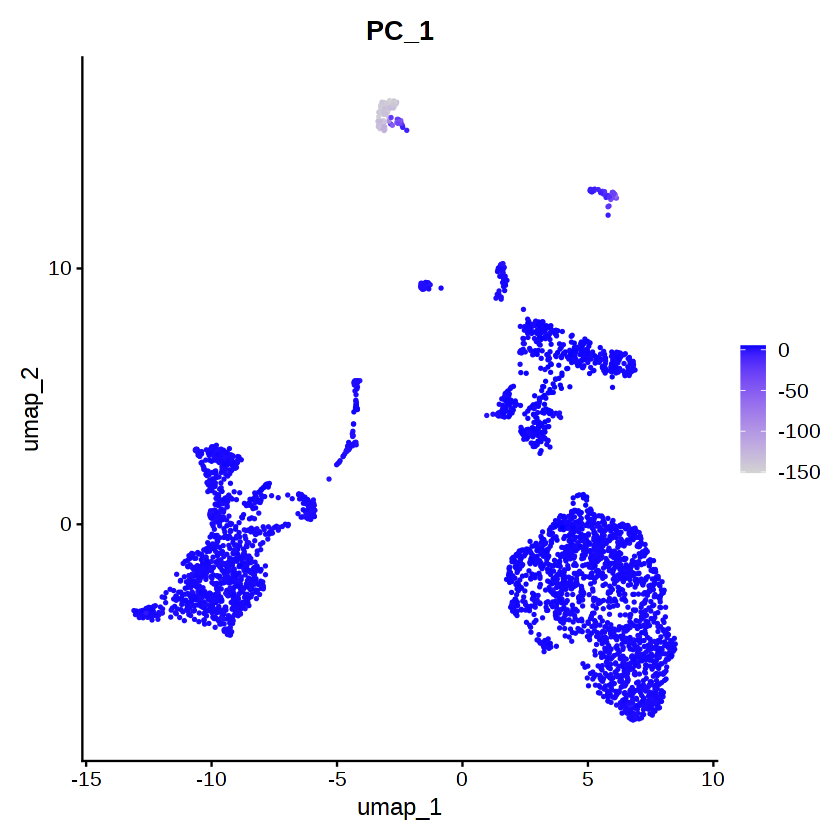

In [57]:
# This looks good.  It does not seem like either percent mitochronrial reads or the
# total UMI per cell is dominating any of the structure we see in the UMAP.

# While we're exploring, let's see about the top PCs.  While both UMAP and PCA are in
# some sense trying to find natural variations in the data, they are very different
# calculations in detail and we should not assume they are (or are not) related.
scPlot <- FeaturePlot(sampleA, features=c("PC_1"))
scPlot
#ggsave("27-FeaturePlot.png",plot = scPlot, bg = 'white')

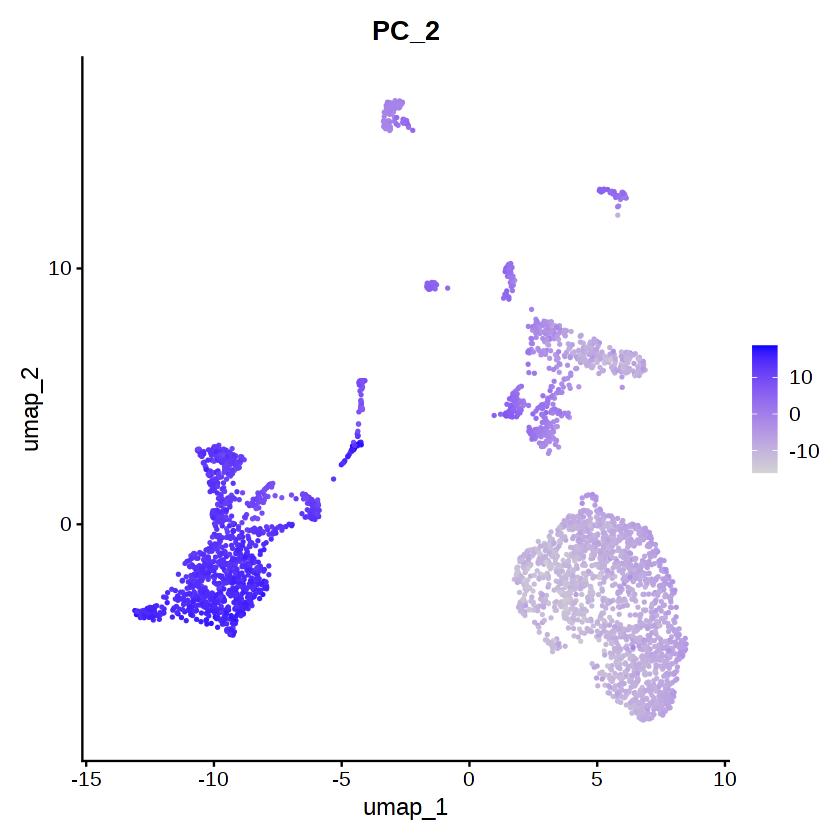

In [58]:
# PC1 does seem to be separating the cells on the far right from the others.
scPlot <- FeaturePlot(sampleA, features=c("PC_2"))
scPlot
#ggsave("28-FeaturePlot.png",plot = scPlot, bg = 'white')

In [59]:
# PC2 seems to mostly be defining a gradient just across cells within the cloud
# in the top left

# Now let's look at some individual genes.
# For an unsupervised approach we could start with some of the most variable genes
top10

[1] "CAPS"     "C20orf85" "GSTA1"    "C9orf24"  "IGFBP7"   "C2orf40" 
 [7] "SAA1"     "LCN2"     "HAMP"     "MT1G"

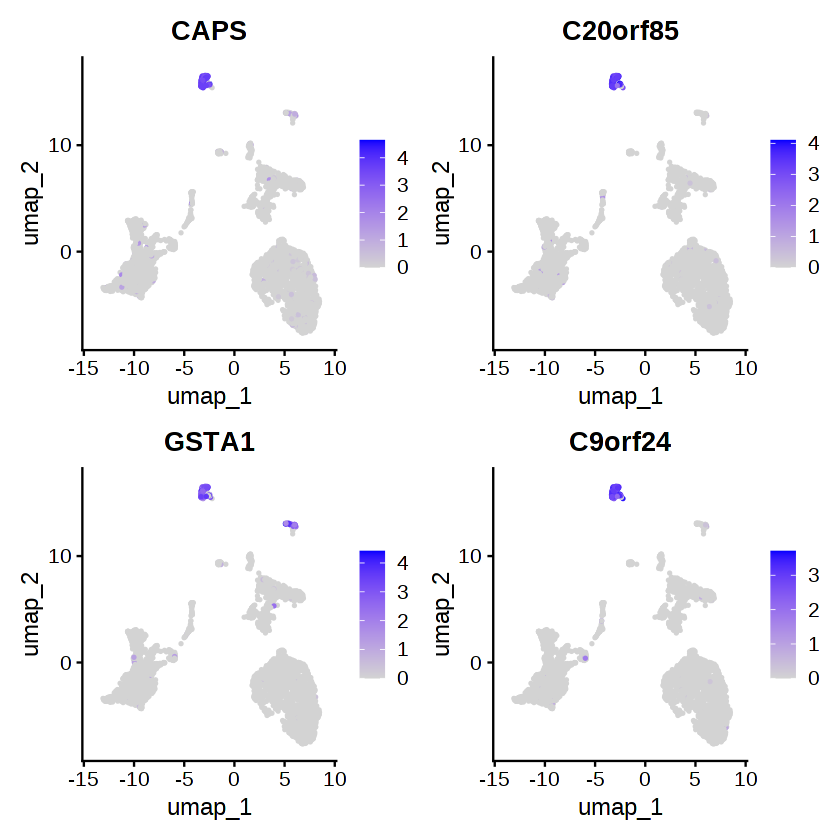

In [60]:
scPlot <- FeaturePlot(sampleA, features=top10[1:4], ncol=2)
scPlot
#ggsave("29-FeaturePlot.png",plot = scPlot, bg = 'white')

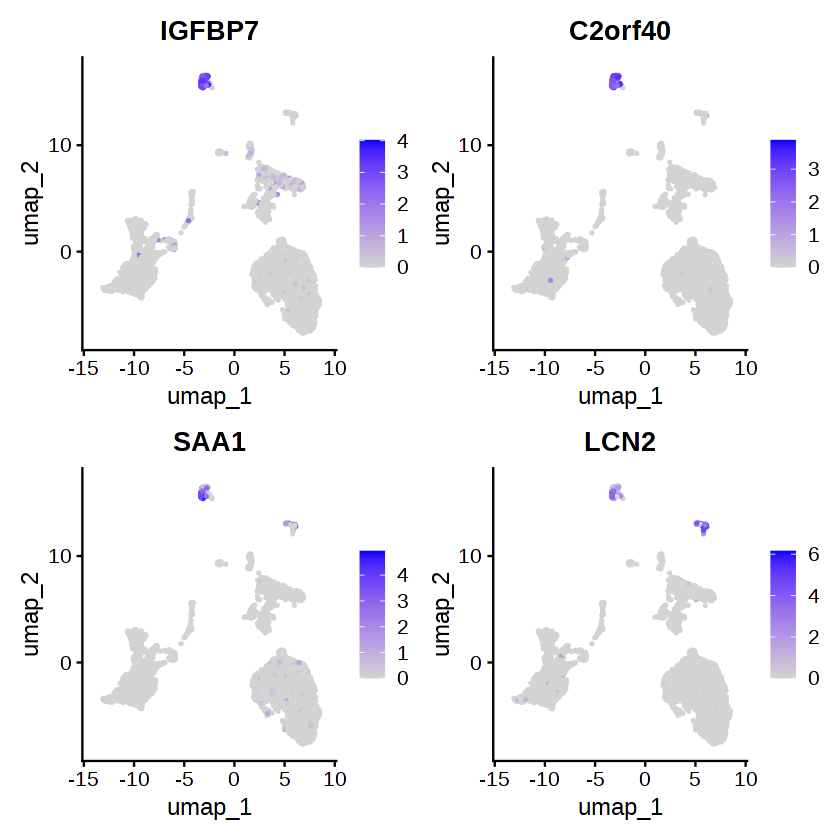

In [61]:
scPlot <- FeaturePlot(sampleA, features=top10[5:8], ncol=2)
scPlot
#ggsave("30-FeaturePlot.png",plot = scPlot, bg = 'white')

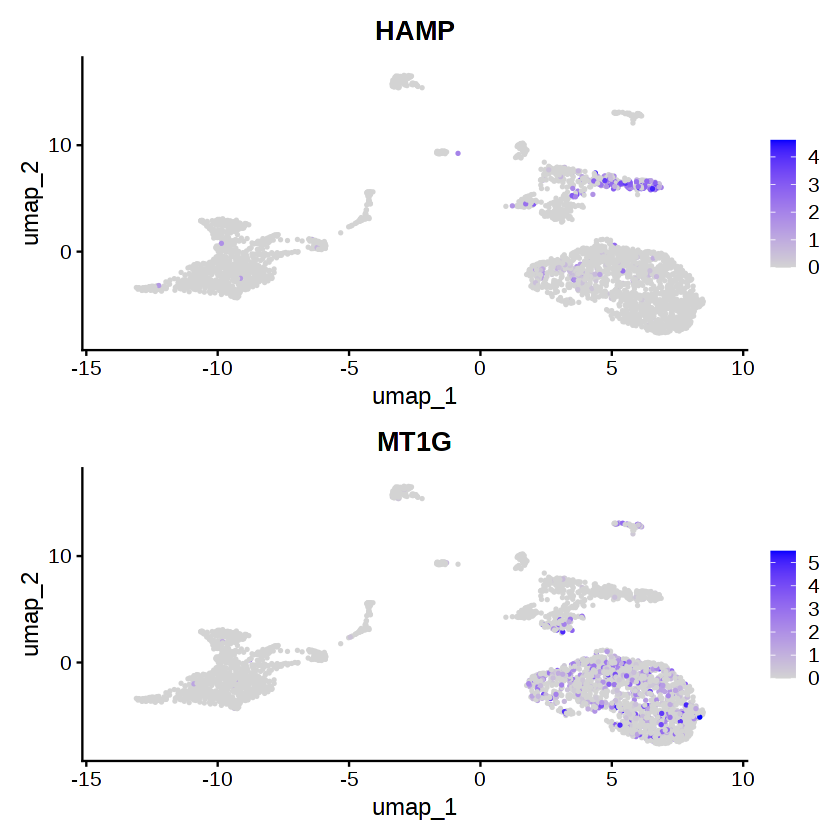

In [62]:
scPlot <- FeaturePlot(sampleA, features=top10[9:10], ncol=1)
scPlot
#ggsave("31-FeaturePlot.png",plot = scPlot, bg = 'white')

In [63]:
# We can also look at some of the genes from top PCs
print(sampleA[["pca"]], dims=1:5, nfeatures=2)

PC_ 1 
Positive:  CTSC, CD52 
Negative:  LRRIQ1, EFCAB1 
PC_ 2 
Positive:  IL32, CD3E 
Negative:  CD68, SERPING1 
PC_ 3 
Positive:  CD52, FGF14 
Negative:  CYP2F1, SCGB3A1 
PC_ 4 
Positive:  MARCKS, SDS 
Negative:  MCEMP1, HP 
PC_ 5 
Positive:  JCHAIN, TSPAN13 
Negative:  CCL8, PLA2G7 


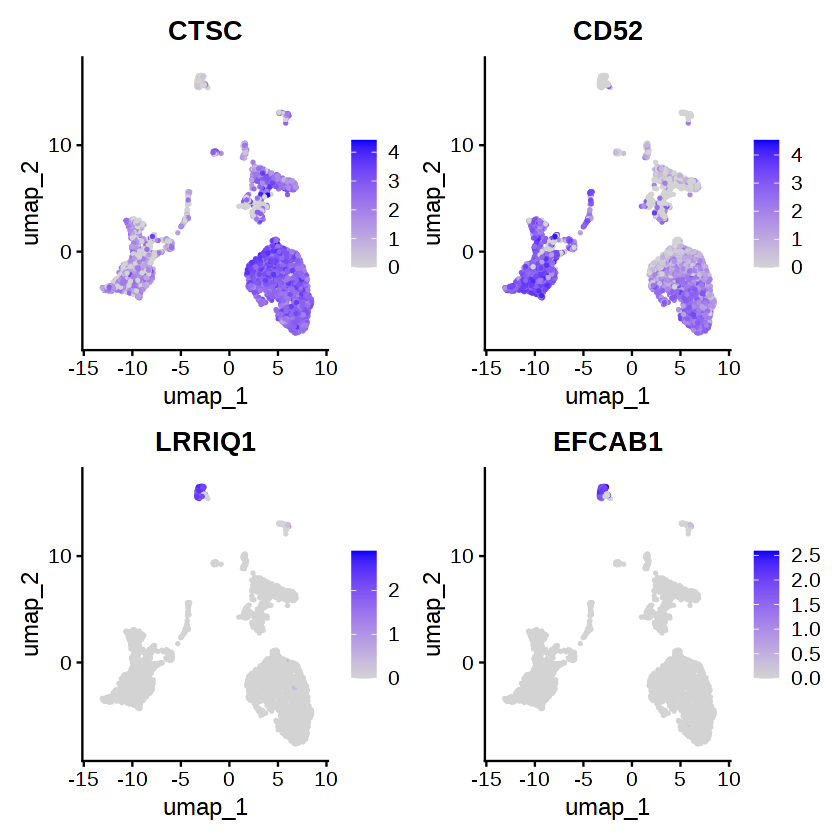

In [64]:
scPlot <- FeaturePlot(sampleA, features=c("CTSC", "CD52", "LRRIQ1", "EFCAB1"))
scPlot
#ggsave("32-FeaturePlot.png",plot = scPlot, bg = 'white')

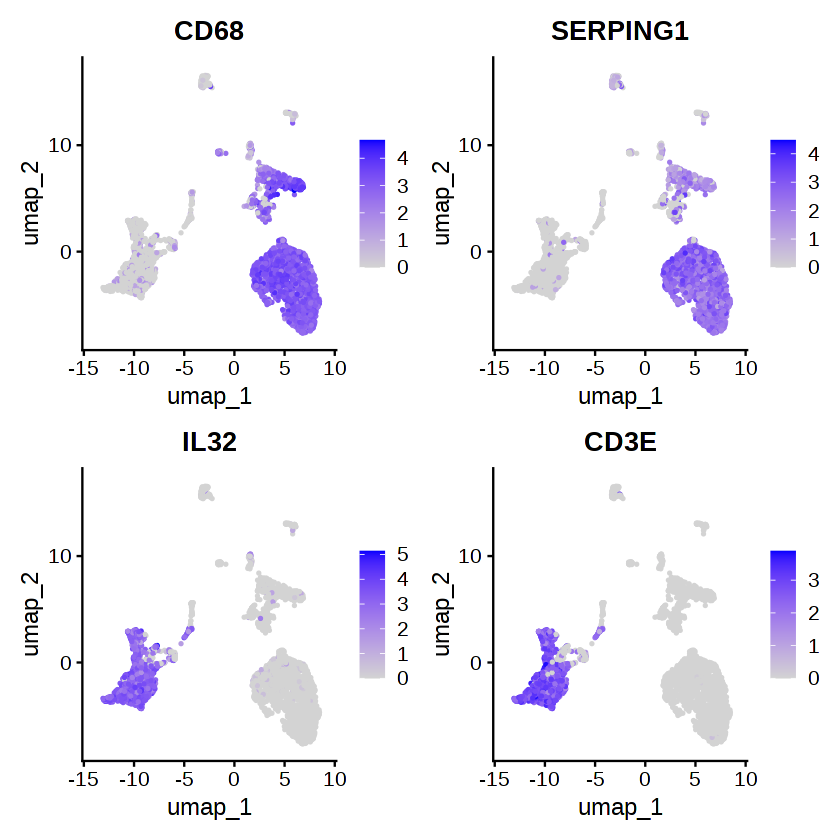

In [65]:
scPlot <- FeaturePlot(sampleA, features=c("CD68", "SERPING1", "IL32", "CD3E"))
scPlot
#ggsave("33-FeaturePlot.png",plot = scPlot, bg = 'white')

#Clustering
Now let's do some formal clustering of this data. While many different clustering algorithms can be used, we will use the nearest-neighbor graph representation of this data and the Louvain algorithm to identify clusters/communities within the graph. Since this framework only leverages distance metrics to the nearest neighbors it is relatively robust to the curse of dimensionality compared to other clustering algorithms.

In [66]:
# We'll calculate distances in the first 20 dimensions.
sampleA <- FindNeighbors(sampleA, dims=1:20)
sampleA <- FindClusters(sampleA)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8634
Number of communities: 17
Elapsed time: 0 seconds


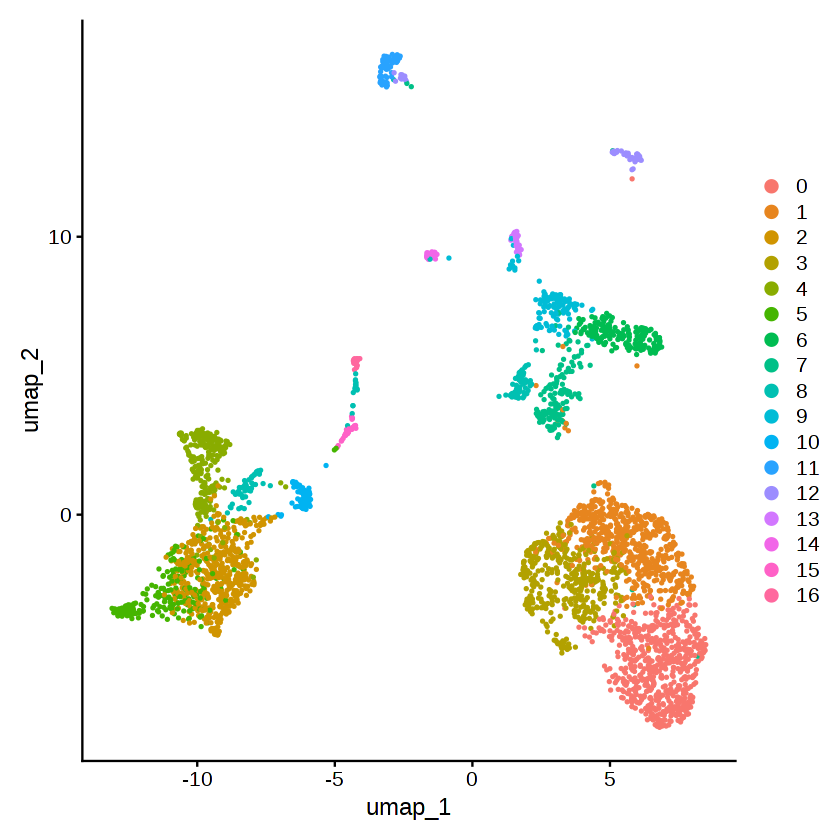

In [67]:
# Now we will visualize cluster membership in the UMAP space.
scPlot <- DimPlot(sampleA, reduction="umap")
scPlot
#ggsave("34-DimPlot.png",plot = scPlot, bg = 'white')

In [68]:
# Almost all clustering algorithms have some sort of free parameter that controls
# how many clusters are identified.
# In the Louvain algorithm we have the *resolution* which, holding all other
# parameters (such as the dimensions, the number of nearest neighbors, etc) constant,
# controls the number of clusters.  Low (high) values for resultion give low (high)
# numbers of clusters.  Let's explore this.
sampleA <- FindClusters(sampleA, resolution=0.01)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9925
Number of communities: 3
Elapsed time: 0 seconds


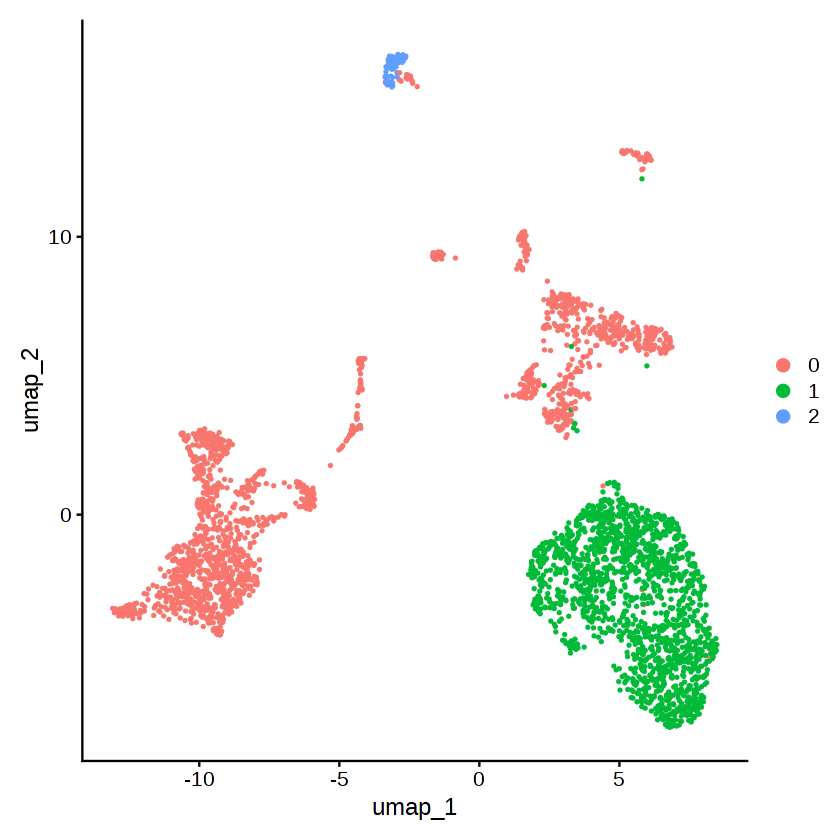

In [69]:
scPlot <- DimPlot(sampleA, reduction="umap")
scPlot
#ggsave("35-DimPlot.png",plot = scPlot, bg = 'white')

In [70]:
sampleA <- FindClusters(sampleA, resolution=10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5226
Number of communities: 58
Elapsed time: 0 seconds


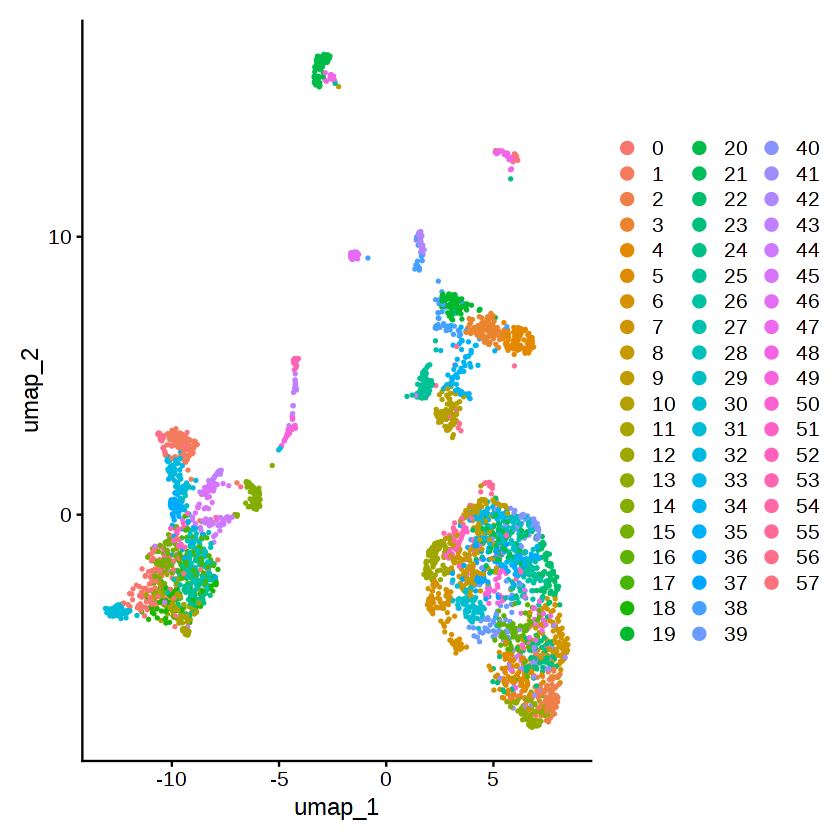

In [71]:
scPlot <- DimPlot(sampleA)
scPlot
#ggsave("36-DimPlot.png",plot = scPlot, bg = 'white')

In [72]:
# It can be useful to see how clusters corresponding to one value of *resolution*
# correspond to those from another *resolution*.  The clustree package does a nice
# job of visualizing this over the clusterings we have already performed.
head(sampleA[[]])

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCTGAGATGTCGG-1 sampleA     3731      1594         1.4473332 
AAACCTGAGGCTCATT-1 sampleA    33339      5273         1.3827649 
AAACCTGCAATCCGAT-1 sampleA     5727      1789         0.0698446 
AAACCTGCATGGTCAT-1 sampleA     4396      2002         0.7051865 
AAACCTGGTTTAGCTG-1 sampleA     3219      1451         2.5473750 
AAACCTGTCACTATTC-1 sampleA      800       559         0.2500000 
                   RNA_snn_res.0.8 seurat_clusters RNA_snn_res.0.01
AAACCTGAGATGTCGG-1 2               44              0               
AAACCTGAGGCTCATT-1 0               5               1               
AAACCTGCAATCCGAT-1 7               10              0               
AAACCTGCATGGTCAT-1 4               56              0               
AAACCTGGTTTAGCTG-1 2               24              0               
AAACCTGTCACTATTC-1 7               34              0               
                   RNA_snn_res.10
AAACCTGAGATGTCGG-1 44            
AAACCTGAGGCTCATT-1 5             
AAACCTGCAATCCGAT-1 10            
AAACCTGCATGGTCAT-1 56            
AAACCTGGTTTAGCTG-1 24            
AAACCTGTCACTATTC-1 34

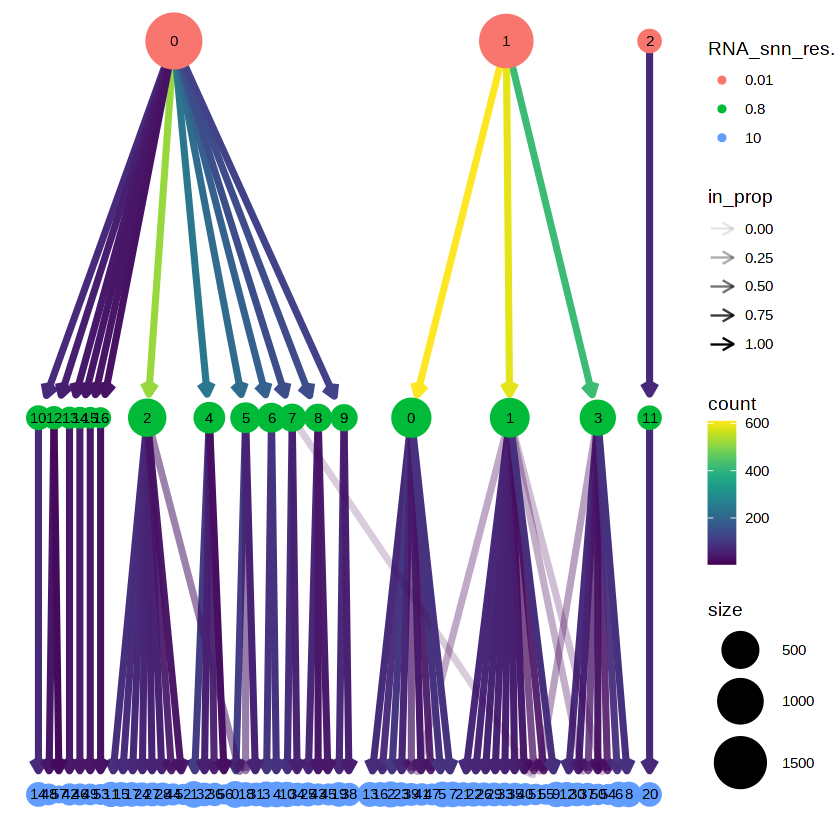

In [73]:
scPlot <- clustree(sampleA,prefix="RNA_snn_res.")
scPlot
#ggsave("37-clustree.png",plot = scPlot, bg = 'white', width = 16, height = 9)

In [74]:
sampleA <- FindClusters(sampleA, resolution=seq(0.1, 2, by=0.1))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9634
Number of communities: 9
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9415
Number of communities: 12
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9256
Number of communities: 12
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9097
Number of communities: 12
Elapsed time: 0 seconds
Modularity Optimi

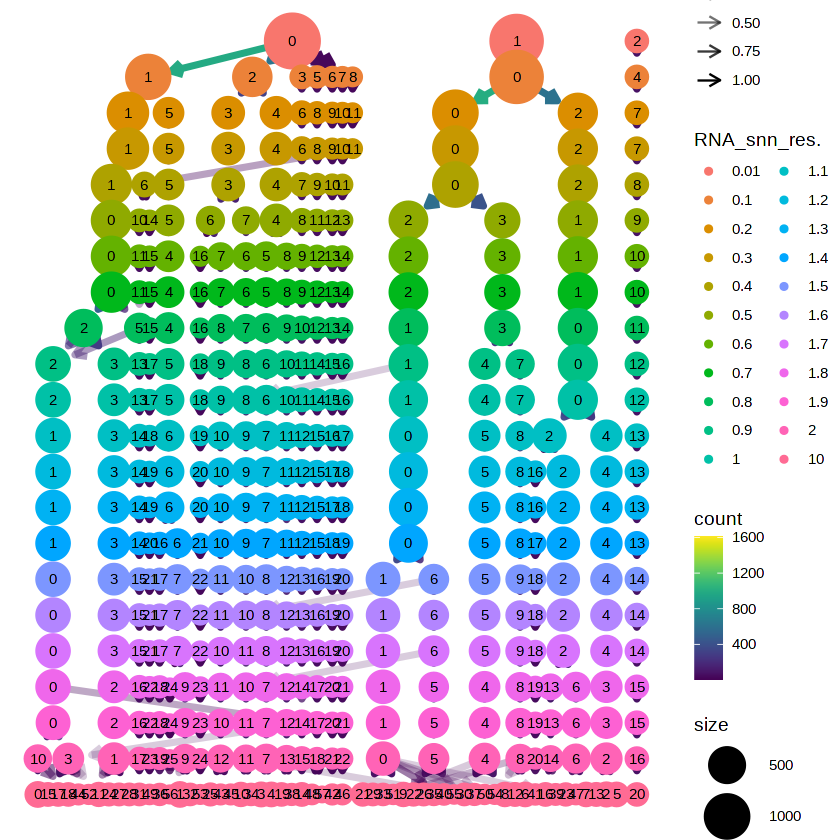

In [75]:
scPlot <- clustree(sampleA,prefix="RNA_snn_res.")
scPlot
#ggsave("38-clustree.png",plot = scPlot, bg = 'white', width = 16, height = 9)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9925
Number of communities: 3
Elapsed time: 0 seconds


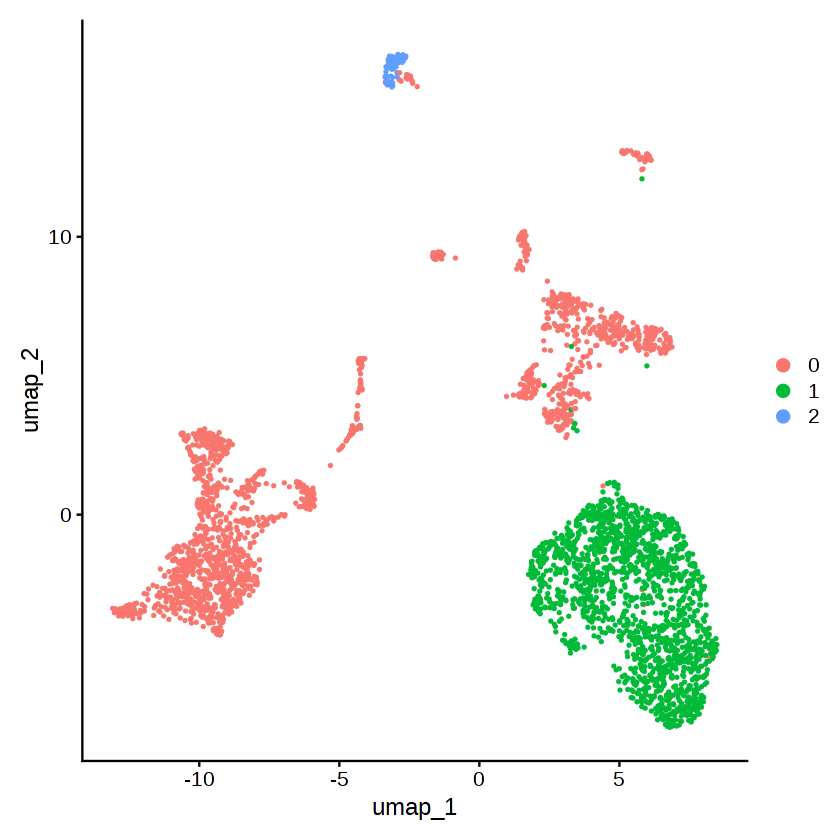

In [76]:
# Now let's go back to the resolution that gave us three clusters
sampleA <- FindClusters(sampleA,resolution=0.01)
scPlot <- DimPlot(sampleA)
scPlot
#ggsave("39-DimPlot.png",plot = scPlot, bg = 'white')

In [77]:
# Here is how we can identify marker genes for cluster 0
cluster0.markers <- FindMarkers(sampleA, ident.1=0, min.pct=0.25)
head(cluster0.markers)

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



p_val avg_log2FC pct.1 pct.2 p_val_adj
CES1       0     -4.345922  0.088 0.959 0        
MARCO      0     -4.545719  0.102 0.955 0        
AC026369.3 0     -3.788303  0.030 0.870 0        
RBP4       0     -5.292052  0.022 0.849 0        
TREM1      0     -3.351192  0.077 0.901 0        
CYP27A1    0     -2.379238  0.130 0.954 0

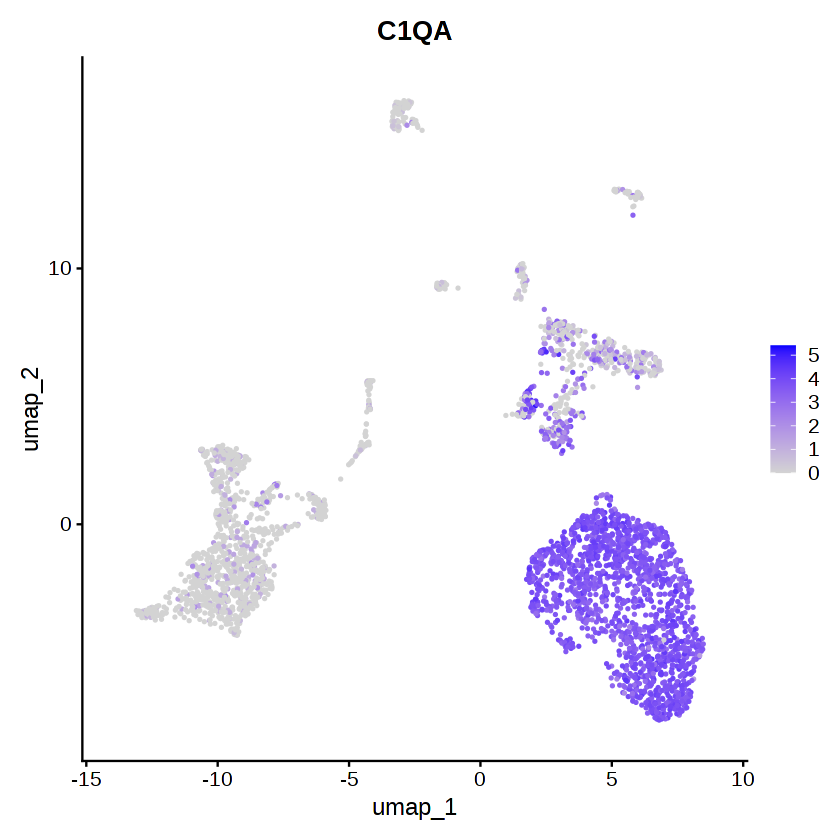

In [78]:
scPlot <- FeaturePlot(sampleA,features="C1QA")
scPlot
#ggsave("40-FeaturePlot.png",plot = scPlot, bg = 'white')

In [79]:
# Since we didn't specify, the previous calculation gave us genes either
# significantly over or under expressed in our population of interest.
# Sometimes we just want over expressed genes, which is easy to filter for.
cluster0.markers <- FindMarkers(sampleA, ident.1=0, min.pct=0.25,only.pos=T)
head(cluster0.markers, 10)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
LIMD2    0.000000e+00  6.878814  0.649 0.049  0.000000e+00
CORO1A  4.158524e-307  5.311701  0.778 0.315 8.429743e-303
PTPRCAP 4.335657e-296 10.600983  0.590 0.007 8.788810e-292
CD48    1.239881e-291  4.649204  0.732 0.233 2.513362e-287
CD3E    5.837022e-276 10.552340  0.564 0.010 1.183223e-271
IFITM1  2.279837e-274  2.446067  0.919 0.893 4.621458e-270
CLEC2D  1.393234e-272  8.757446  0.567 0.017 2.824225e-268
IL32    9.238283e-267  8.103002  0.604 0.066 1.872692e-262
CD2     6.511810e-262  9.342396  0.558 0.024 1.320009e-257
CST7    1.216906e-239  9.900031  0.502 0.005 2.466791e-235

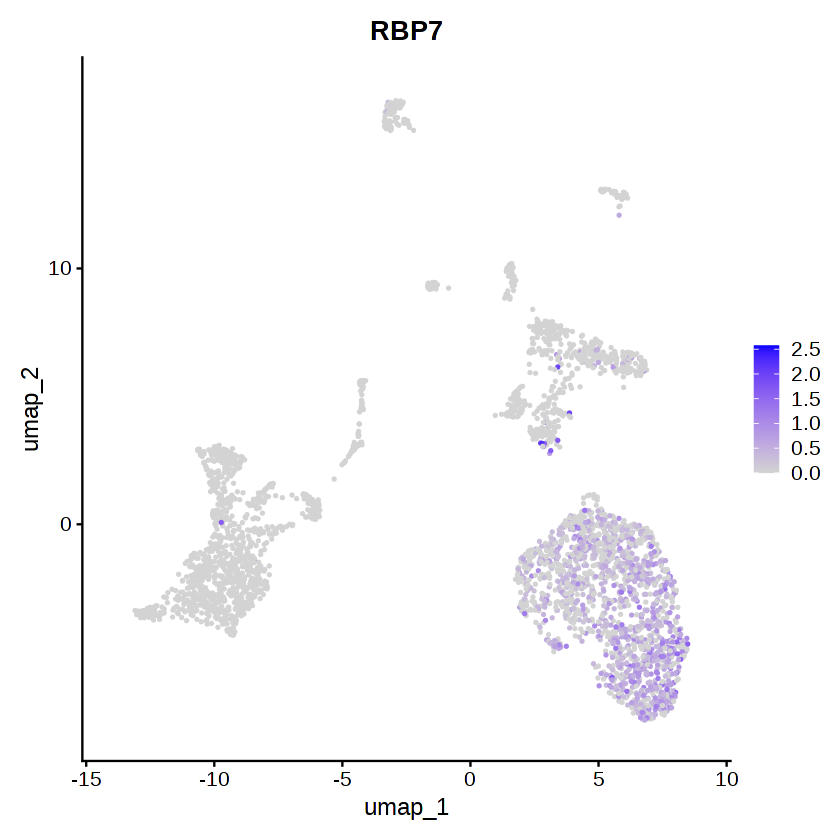

In [80]:
scPlot <- FeaturePlot(sampleA, features="RBP7")
scPlot
#ggsave("41-FeaturePlot.png",plot = scPlot, bg = 'white')

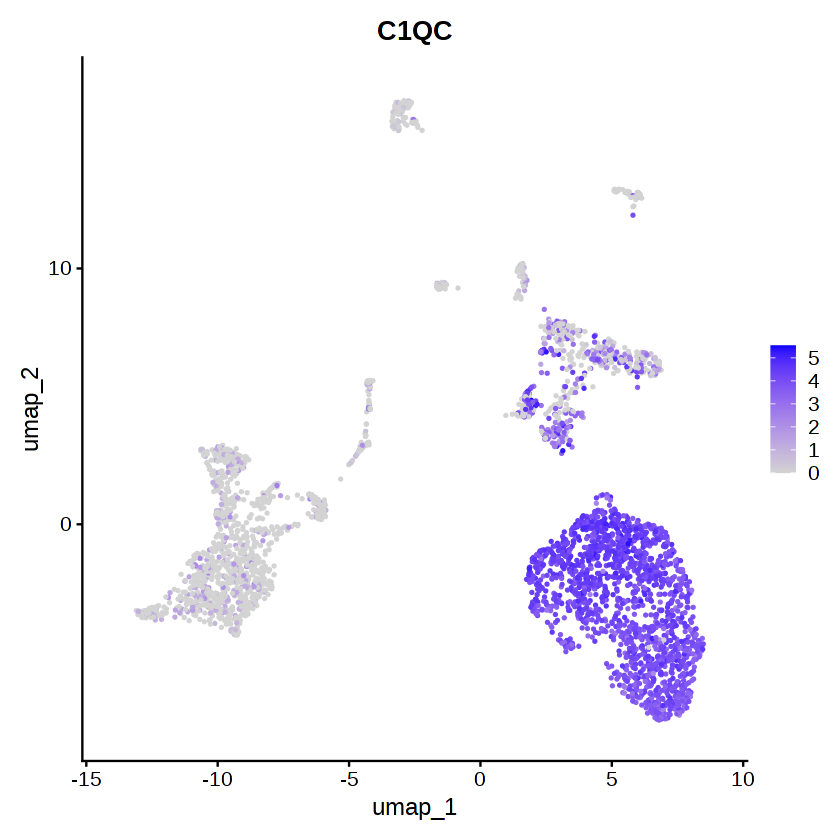

In [81]:
scPlot <- FeaturePlot(sampleA, features=c("C1QC"))
scPlot
#ggsave("42-FeaturePlot.png",plot = scPlot, bg = 'white')

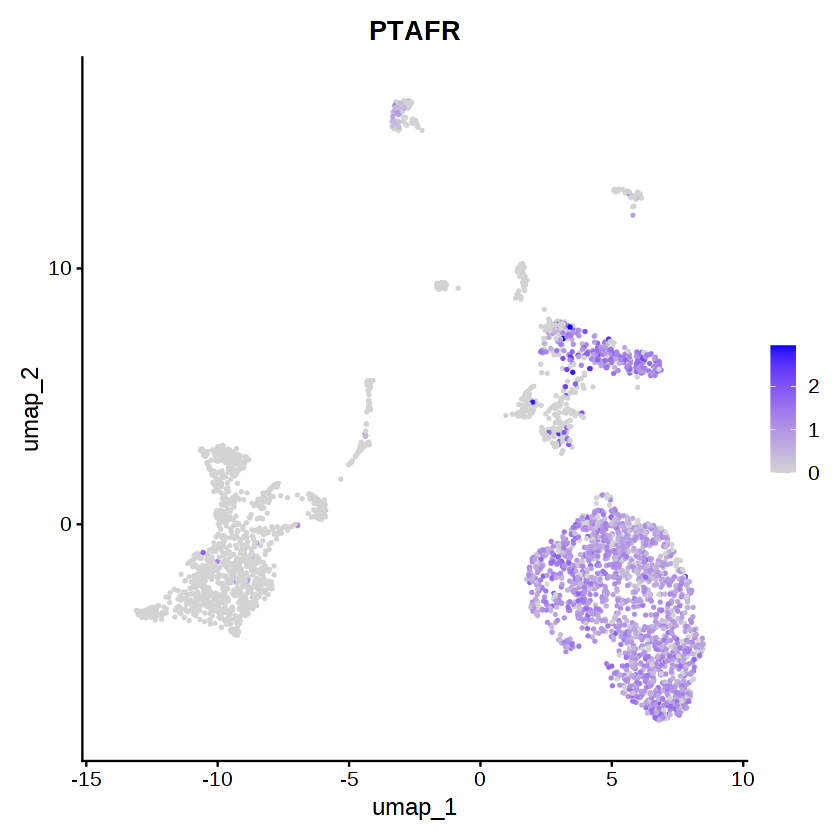

In [82]:
scPlot <- FeaturePlot(sampleA, features=c("PTAFR"))
scPlot
#ggsave("43-FeaturePlot.png",plot = scPlot, bg = 'white')

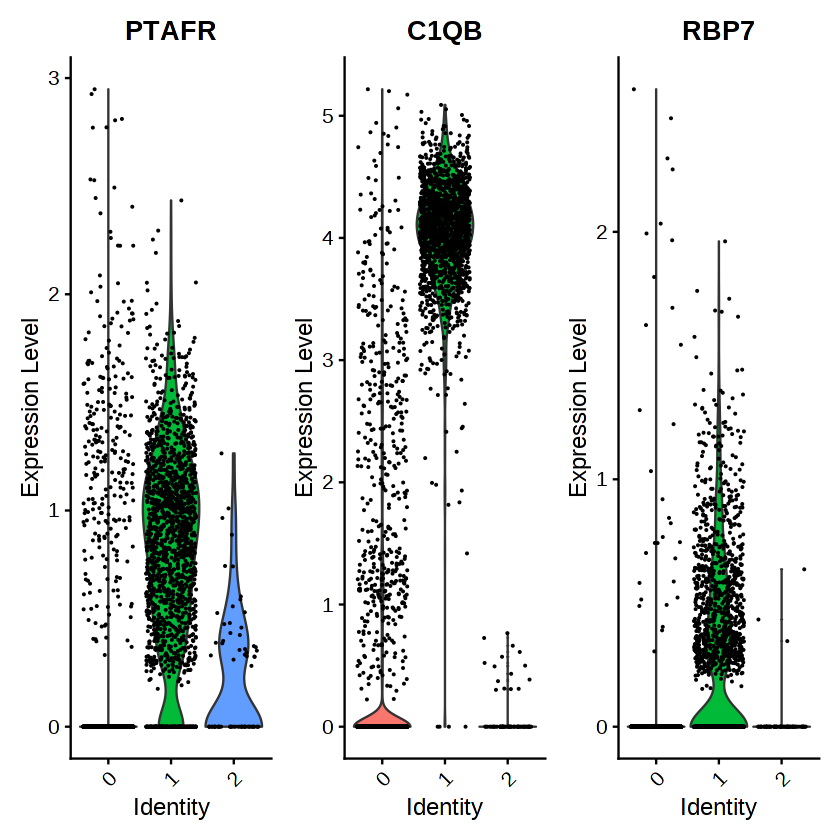

In [83]:
# It's always good to try multiple different visualizations.
scPlot <- VlnPlot(sampleA, features=c("PTAFR", "C1QB", "RBP7"))
scPlot
#ggsave("44-VlnPlot.png",plot = scPlot, bg = 'white')

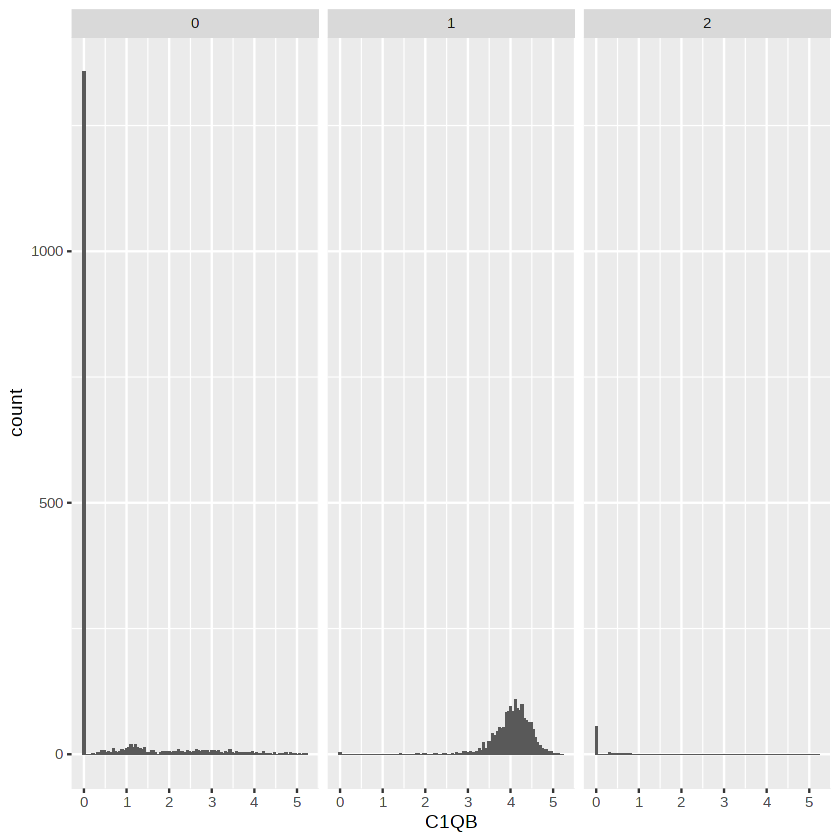

In [84]:
scPlot <- sampleA %>%
          FetchData(vars=c("C1QB", "seurat_clusters")) %>%
          ggplot() +
          geom_histogram(aes(x=C1QB), bins=100) +
          facet_wrap(. ~ seurat_clusters)
scPlot
#ggsave("45-histogram.png",plot = scPlot, bg = 'white')

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene   
LIMD2    0.000000e+00  6.878814  0.649 0.049  0.000000e+00 0       LIMD2  
CORO1A  4.158524e-307  5.311701  0.778 0.315 8.429743e-303 0       CORO1A 
PTPRCAP 4.335657e-296 10.600983  0.590 0.007 8.788810e-292 0       PTPRCAP
CD48    1.239881e-291  4.649204  0.732 0.233 2.513362e-287 0       CD48   
CD3E    5.837022e-276 10.552340  0.564 0.010 1.183223e-271 0       CD3E   
IFITM1  2.279837e-274  2.446067  0.919 0.893 4.621458e-270 0       IFITM1

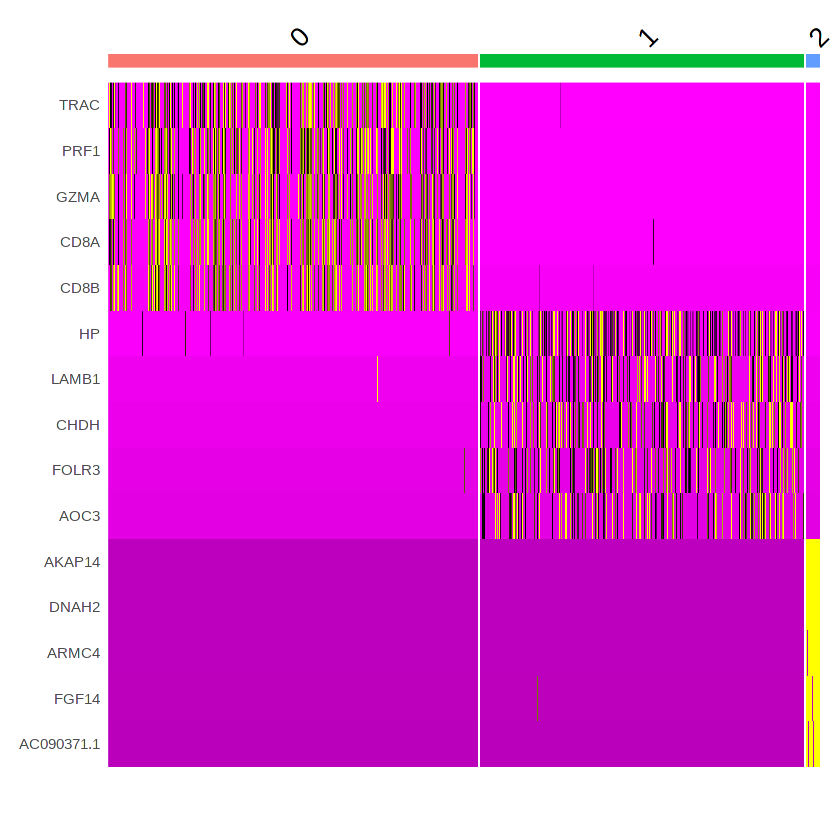

In [85]:
# Now let's find over-expressed marker genes for all clusters.
sampleA.markers = FindAllMarkers(sampleA, only.pos=TRUE,
                            min.pct=0.25, logfc.threshold=0.25)
head(sampleA.markers)
topMarkers <- sampleA.markers %>%
  group_by(cluster) %>%
  top_n(n=5, wt=avg_log2FC)
scPlot <- DoHeatmap(sampleA, features = topMarkers$gene) + NoLegend()
scPlot
#ggsave("46-DoHeatmap.png",plot = scPlot, bg = 'white')

In [86]:
# If we crank up the resolution a little we get some finer-grained separation
# of the UMAP clouds.
sampleA <- FindClusters(sampleA, resolution=0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3527
Number of edges: 118229

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9415
Number of communities: 12
Elapsed time: 0 seconds


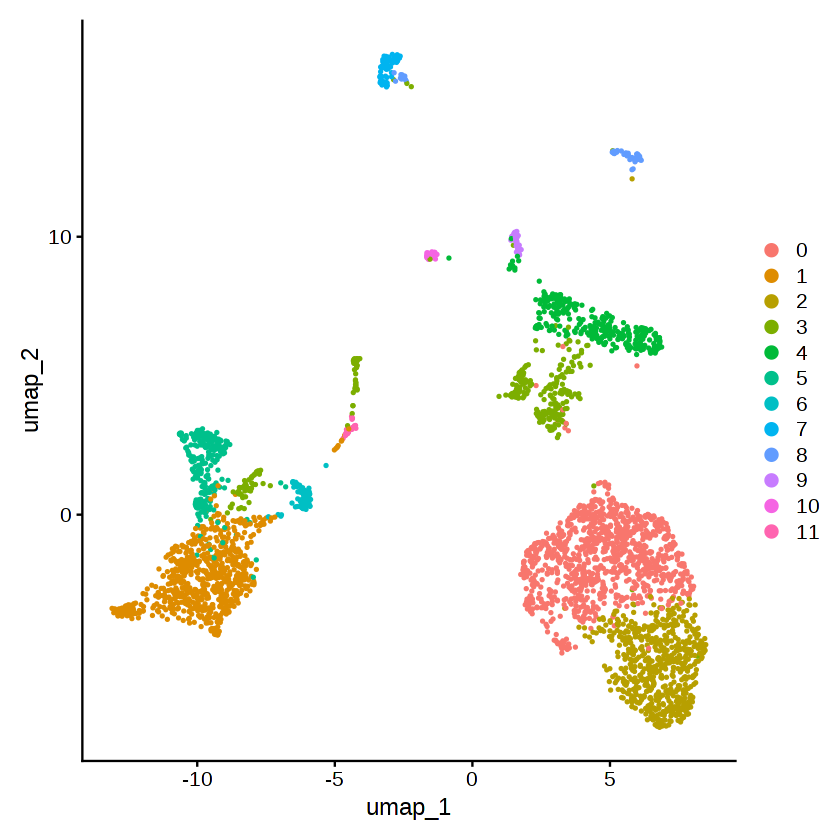

In [87]:
scPlot <- DimPlot(sampleA)
scPlot
#ggsave("47-DoHeatmap.png",plot = scPlot, bg = 'white')

# Differential Expression

In [88]:
# Let's see if cluster 2 and cluster 0 really have different gene expression
# patterns and, if so, whether those match any biology we already know and
# might expect to see in PBMCs.
cluster1vs0 <- FindMarkers(sampleA, ident.1 = 2, ident.2 = 0)
head(cluster1vs0, 20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
MCEMP1   1.072880e-211  3.318062  0.995 0.450 2.174835e-207
APOBEC3A 1.468758e-157 -2.639866  0.685 0.980 2.977319e-153
ALOX5AP  1.438805e-141  1.192886  0.997 0.971 2.916603e-137
IFITM1   1.713684e-139 -2.240540  0.755 0.971 3.473810e-135
LILRB4   1.547143e-126 -1.998057  0.668 0.930 3.136214e-122
HP       2.454568e-126  2.853578  0.881 0.425 4.975655e-122
STAC     1.601097e-122  2.552517  0.810 0.319 3.245584e-118
APOE     3.240450e-122 -1.830766  0.984 0.996 6.568716e-118
MARCKS   1.328338e-120 -3.893522  0.119 0.717 2.692674e-116
CXCL11   8.177086e-114 -4.803798  0.176 0.737 1.657577e-109
CD14     1.231524e-112 -1.873937  0.786 0.961 2.496423e-108
MRC1     6.146140e-112  1.577463  0.979 0.858 1.245884e-107
PNPLA6   7.800927e-111  1.741149  0.951 0.742 1.581326e-106
SVIL     1.508053e-108  1.957544  0.869 0.485 3.056975e-104
RETN     1.535556e-104  2.109723  0.895 0.574 3.112725e-100
PPARG    6.864114e-103  1.381511  0.946 0.804  1.391425e-98
INHBA    8.949054e-103  2.660532  0.680 0.188  1.814063e-98
ALOX5    4.800783e-102  1.029474  0.989 0.948  9.731668e-98
GPD1     2.177903e-100  3.627084  0.560 0.100  4.414827e-96
CD52      5.806709e-98  1.484426  0.984 0.898  1.177078e-93

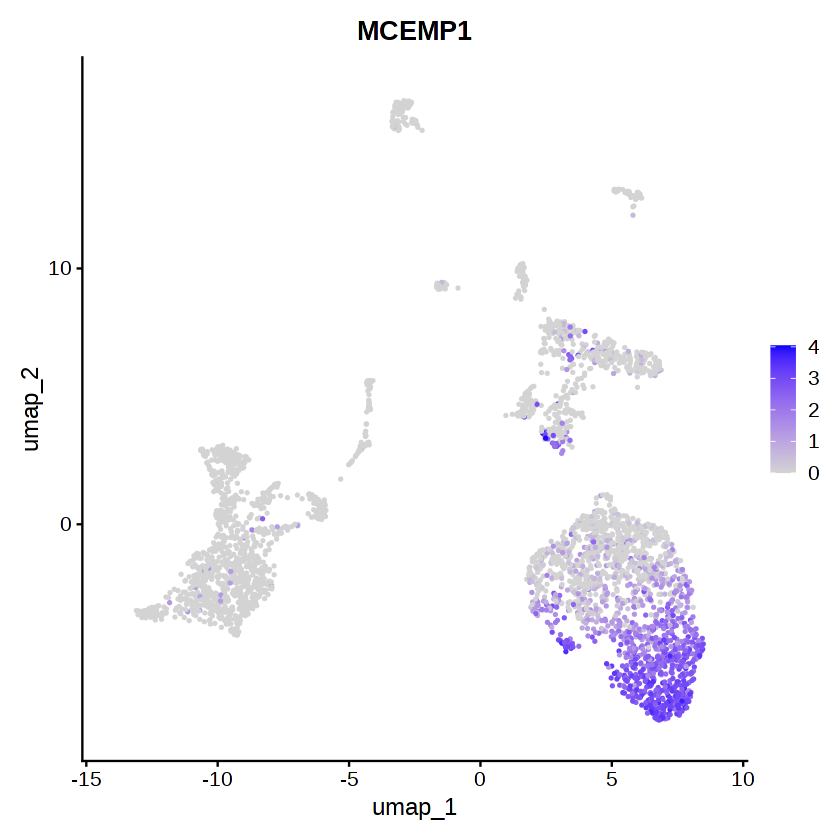

In [89]:
scPlot <- FeaturePlot(sampleA, features="MCEMP1")
scPlot
#ggsave("48-FeaturePlot.png",plot = scPlot, bg = 'white')

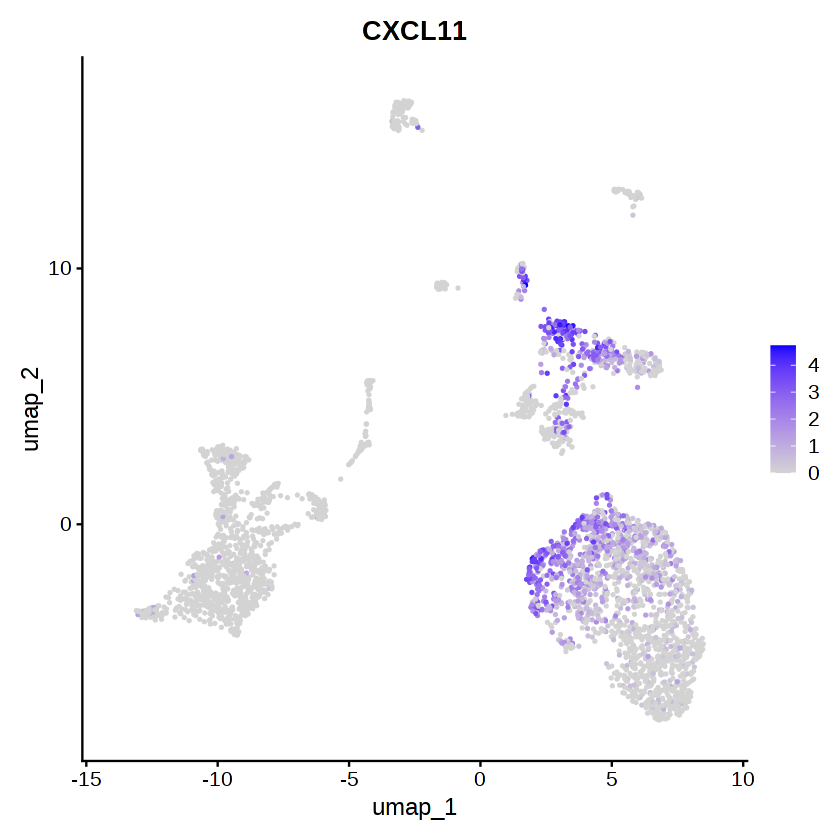

In [90]:
scPlot <- FeaturePlot(sampleA, features="CXCL11")
scPlot
#ggsave("49-FeaturePlot.png",plot = scPlot, bg = 'white')

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



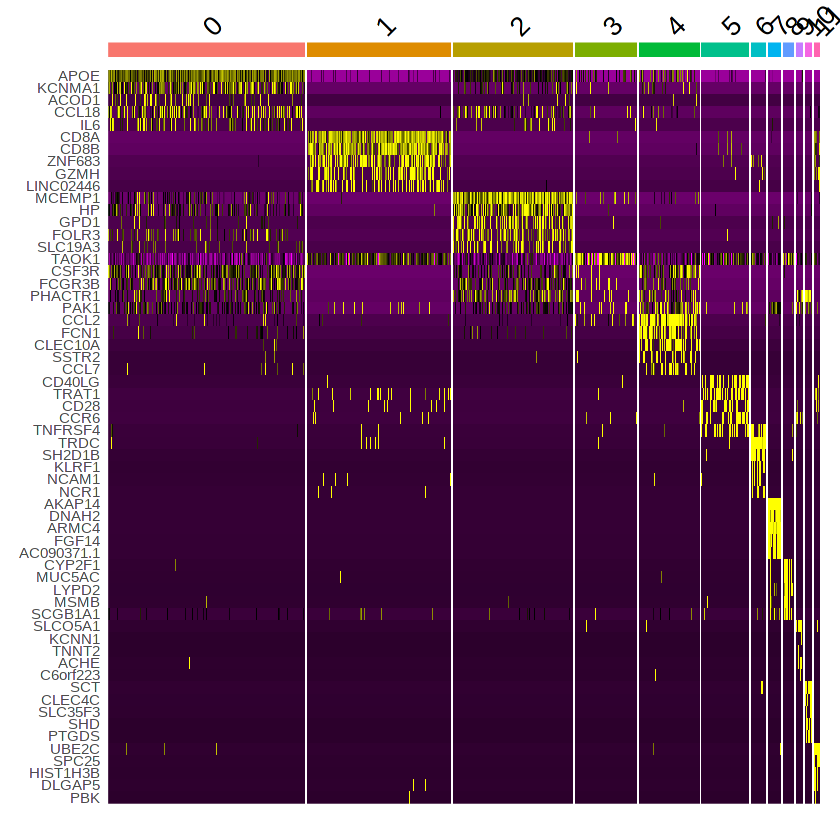

In [91]:
# Note that CXCL11 is also expressed in another group.  We had
# ignored them when looking for differentially expressed genes between clusters
# 2 and 0 so this should not be surprising.
sampleA.markers = FindAllMarkers(sampleA, only.pos=TRUE, min.pct=0.25)
topMarkers = sampleA.markers %>%
  group_by(cluster) %>%
  top_n(n=5, wt=avg_log2FC)
scPlot <- DoHeatmap(sampleA, features = topMarkers$gene) + NoLegend()
scPlot
#ggsave("50-DoHeatmap.png",plot = scPlot, bg = 'white')

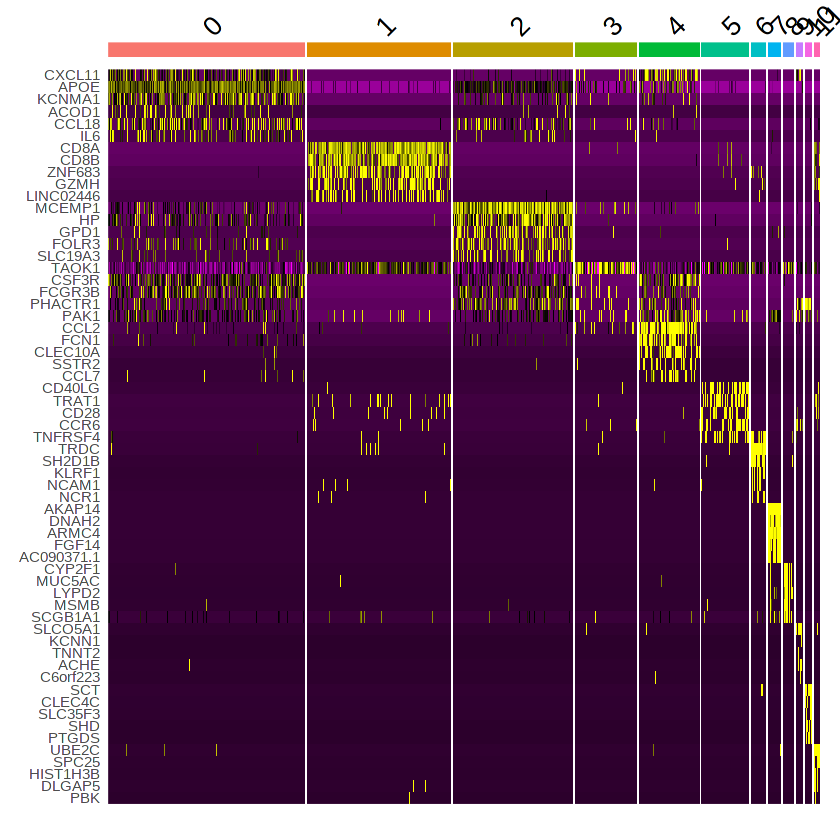

In [92]:
topMarkers = sampleA.markers %>%
  group_by(cluster) %>%
  top_n(n=5, wt=avg_log2FC)
scPlot <- DoHeatmap(sampleA, features = c("CXCL11", topMarkers$gene)) + NoLegend()
scPlot
#ggsave("51-DoHeatmap.png",plot = scPlot, bg = 'white')

# Annotating Cell Types

Interpreting the findings we obtained is likely the most difficult task during single-cell data analysis. By annotating the cell types using statistical methods that compare expression profiles from our data to a reference dataset, we can go beyond the abstract definitions given by the clusters we identified.

We start by loading a reference dataset that contains the cell types we expect to see on our samples. The `celldex` package provides a number of curated and well-annotated datasets. Most of them are originated from bulk RNA-Seq and microarray experiments, but they are more than enough to annotated single-cell datasets. In our example, we will use the Blueprint and ENCODE reference dataset.

In [93]:
library(celldex)
ref = BlueprintEncodeData()
ref

class: SummarizedExperiment 
dim: 19859 259 
metadata(0):
assays(1): logcounts
rownames(19859): TSPAN6 TNMD ... LINC00550 GIMAP1-GIMAP5
rowData names(0):
colnames(259): mature.neutrophil
  CD14.positive..CD16.negative.classical.monocyte ...
  epithelial.cell.of.umbilical.artery.1
  dermis.lymphatic.vessel.endothelial.cell.1
colData names(3): label.main label.fine label.ont

Then, to use the `SingleR()` function, we need to convert the `Seurat` object to a `SingleCellExperiment` Bioconductor object. The `SingleR()` function takes our dataset, the reference dataset and the labels of the reference dataset.

In [94]:
library(SingleR)
my.sce = as.SingleCellExperiment(sampleA)
pred = SingleR(my.sce, ref=ref, labels=ref$label.main)
table(pred$labels)


Attaching package: ‘SingleR’


The following objects are masked from ‘package:celldex’:

    BlueprintEncodeData, DatabaseImmuneCellExpressionData,
    HumanPrimaryCellAtlasData, ImmGenData, MonacoImmuneData,
    MouseRNAseqData, NovershternHematopoieticData





      Adipocytes          B-cells     CD4+ T-cells     CD8+ T-cells 
               3               83              103              931 
              DC Epithelial cells     Erythrocytes              HSC 
              59              109                4               13 
     Macrophages      Melanocytes  Mesangial cells        Monocytes 
            1975                2                1              135 
     Neutrophils         NK cells 
              10               99 

We can use a heatmap to visualize the resulting cell type annotation. At the top of the heatmap, we see the color code identifying the different cell types

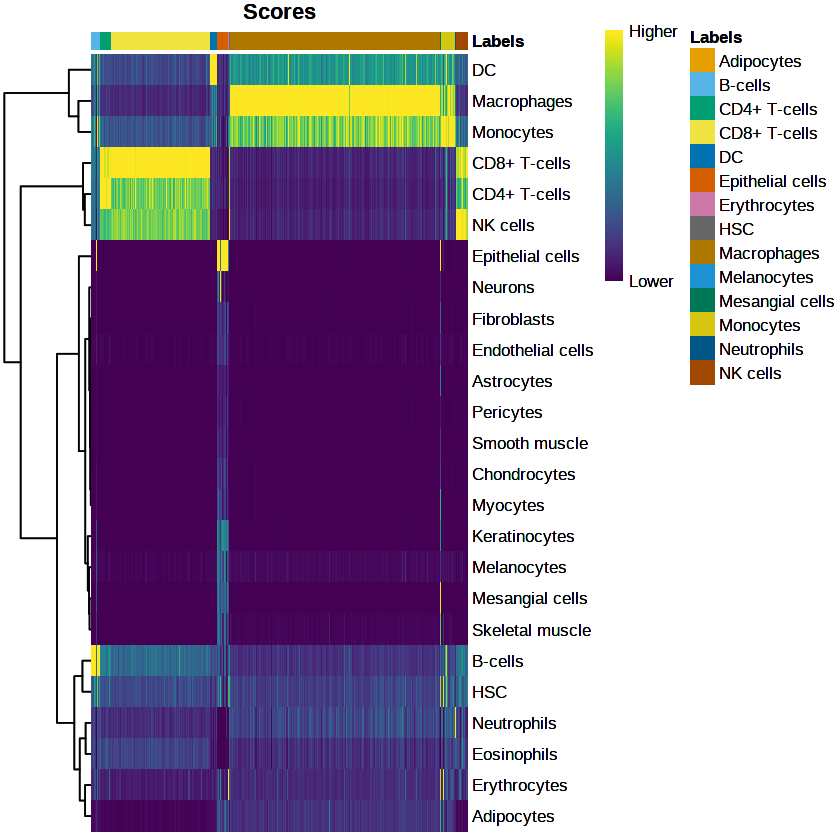

In [95]:
#png("52-plotScoreHeatmap.png", res = 300, width = 1920, height = 1920)
plotScoreHeatmap(pred)
#dev.off()

A heatmap can also be used to show the distribution of the cell types by the clusters we identified using `Seurat`.

In [96]:
my.table = table(Assigned=pred$pruned.labels,
                 cluster=my.sce$seurat_clusters)
my.table
library(pheatmap)
pheatmap(log2(my.table + 1), filename = "53-pheatmap.png")

                  cluster
Assigned             0   1   2   3   4   5   6   7   8   9  10  11
  Adipocytes         0   0   0   0   0   0   0   0   3   0   0   0
  B-cells            0   0   0  48   1   0   0   1   0   0  29   4
  CD4+ T-cells       0   0   0   1   0  97   0   0   0   0   0   4
  CD8+ T-cells       0 723   0   6   0 144   0   0   0   0   0  18
  DC                 0   0   0   2   8   0   0   0   0  38   1   0
  Epithelial cells   0   0   0   0   0   0   0  69  33   0   0   0
  Erythrocytes       0   0   0   1   0   0   0   0   3   0   0   0
  HSC                0   0   0   9   0   1   0   0   2   0   1   0
  Macrophages      959   0 594   1 206   0   0   0   0   0   0   0
  Melanocytes        0   0   0   0   0   0   0   0   2   0   0   0
  Mesangial cells    0   0   0   0   0   0   0   0   1   0   0   0
  Monocytes          9   0   4  38  75   0   0   0   4   0   5   0
  Neutrophils        0   0   0  10   0   0   0   0   0   0   0   0
  NK cells           0  12   0   8  

# GO Enrichment Analyses

In [97]:
my.genes = sampleA.markers %>%
  filter(abs(avg_log2FC) > 1,
         p_val_adj < 0.10) %>%
  dplyr::select(gene) %>%
  pull()
head(my.genes)

[1] "CD14"  "CD163" "CFD"   "PILRA" "APOE"  "C1QB"

In [98]:
nrow(sampleA.markers)
genes <- sampleA.markers %>% arrange(desc(avg_log2FC))
head(genes)

[1] 24437

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster gene    
HIST1H3B 0     12.69779   0.655 0.000 0         11      HIST1H3B
AKAP14   0     12.54348   0.986 0.000 0         7       AKAP14  
MUC5AC   0     12.09369   0.556 0.003 0         8       MUC5AC  
FGF14    0     12.07191   0.901 0.000 0         7       FGF14   
ARMC4    0     12.04299   0.944 0.001 0         7       ARMC4   
CLEC4C   0     12.02301   0.730 0.001 0         10      CLEC4C

In [99]:
library(clusterProfiler)

my.map = bitr(my.genes,
              fromType="SYMBOL",
              toType="ENTREZID",
              OrgDb="org.Hs.eg.db")
head(my.map)
length(my.genes) - nrow(my.map)



'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(my.genes, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
“7.11% of input gene IDs are fail to map...”


SYMBOL ENTREZID
1 CD14   929     
2 CD163  9332    
3 CFD    1675    
4 PILRA  29992   
5 APOE   348     
6 C1QB   713

[1] 2156

## GO Classification

In [100]:
## subontologies: BP, MF, CC
library(org.Hs.eg.db)
ggo_bp = groupGO(gene     = my.map$ENTREZID,
                 OrgDb    = org.Hs.eg.db,
                 ont      = "BP",
                 readable = TRUE)
head(ggo_bp)

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:clusterProfiler’:

    select


The following object is masked from ‘package:dplyr’:

    select




ID         Description           Count GeneRatio
GO:0000003 GO:0000003 reproduction           479  479/5993 
GO:0002376 GO:0002376 immune system process 1009  1009/5993
GO:0008152 GO:0008152 metabolic process     3501  3501/5993
GO:0009987 GO:0009987 cellular process      5043  5043/5993
GO:0016032 GO:0016032 viral process          183  183/5993 
GO:0022414 GO:0022414 reproductive process   477  477/5993 
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [101]:
## subontologies: BP, MF, CC
ggo_mf = groupGO(gene     = my.map$ENTREZID,
                 OrgDb    = org.Hs.eg.db,
                 ont      = "MF",
                 readable = TRUE)
head(ggo_mf)

ID         Description                  Count GeneRatio
GO:0003774 GO:0003774 cytoskeletal motor activity    60  60/5993  
GO:0003824 GO:0003824 catalytic activity           1876  1876/5993
GO:0005198 GO:0005198 structural molecule activity  180  180/5993 
GO:0005215 GO:0005215 transporter activity          342  342/5993 
GO:0005488 GO:0005488 binding                      5140  5140/5993
GO:0016209 GO:0016209 antioxidant activity           40  40/5993  
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [102]:
## subontologies: BP, MF, CC
ggo_cc = groupGO(gene     = my.map$ENTREZID,
                 OrgDb    = org.Hs.eg.db,
                 ont      = "CC",
                 readable = TRUE)

head(ggo_cc)

ID         Description                Count GeneRatio
GO:0032991 GO:0032991 protein-containing complex 1986  1986/5993
GO:0044423 GO:0044423 virion component              0  0/5993   
GO:0110165 GO:0110165 cellular anatomical entity 5534  5534/5993
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## GO over-representation analysis

In [103]:
ego <- enrichGO(gene          = my.map$ENTREZID,
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05,
        readable      = TRUE)
head(ego)

ID         Description                                  GeneRatio
GO:0044782 GO:0044782 cilium organization                          247/5320 
GO:0060271 GO:0060271 cilium assembly                              228/5320 
GO:0007018 GO:0007018 microtubule-based movement                   223/5320 
GO:0002764 GO:0002764 immune response-regulating signaling pathway 244/5320 
GO:0002757 GO:0002757 immune response-activating signaling pathway 231/5320 
GO:0002263 GO:0002263 cell activation involved in immune response  160/5320 
           BgRatio   pvalue       p.adjust     qvalue      
GO:0044782 407/18870 2.166782e-43 1.370489e-39 9.853155e-40
GO:0060271 378/18870 1.660641e-39 5.251778e-36 3.775774e-36
GO:0007018 420/18870 1.842746e-27 3.885123e-24 2.793215e-24
GO:0002764 500/18870 4.201471e-23 6.643576e-20 4.776409e-20
GO:0002757 473/18870 5.497745e-22 6.954647e-19 5.000054e-19
GO:0002263 305/18870 2.247955e-19 2.197460e-16 1.579867e-16
           geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
GO:0044782 SNX10/CCDC88A/SYNE2/ODF2L/EHD1/CYLD/RILP/CLCN4/OCRL/PTPDC1/SNAP29/MKKS/NECTIN2/ATP6V0D1/TMEM138/TTC39C/ABLIM1/DNAI1/CFAP221/HYDIN/RSPH4A/CFAP43/RSPH9/DRC1/DNAH5/CFAP157/ZMYND10/RSPH1/ERICH3/DNAH2/TEKT2/NME5/RP1/TEKT1/SPAG17/CFAP126/DNAH7/MAPK15/DNAI2/FOXJ1/CEP126/CCDC113/SPAG6/TMEM231/CFAP73/CFAP44/CCDC65/MNS1/UBXN10/SPEF1/CFAP46/CFAP65/LCA5/CFAP70/BBOF1/TTC29/DNAJB13/DNAAF3/CFAP100/CCDC40/CCDC39/DRC7/CFAP74/CFAP54/CFAP69/KIF19/LCA5L/CFAP47/IQUB/TEKT4/DAW1/CCDC96/WDR90/CFAP58/CFAP61/CFAP161/LRRC43/PARVA/CCNO/CFAP206/TEKT3/YAP1/MEIG1/DCDC2/ENO4/DZIP1/LRGUK/TUB/FAM161A/CATIP/TMEM67/B9D1/DNAH1/UNC119B/DYNC2H1/IFT172/SPEF2/IFT140/RAB17/IFT81/WDR19/RPGRIP1L/GAS8/LAMA5/TRAF3IP1/INTU/SPACA9/RFX2/TCTN2/DNAL1/TTC12/KIF24/MAK/RFX3/KIF27/FNBP1L/ROPN1B/CROCC/ENKD1/TTC21A/IFT88/SPAG1/SPATA6/ARL6/IFT80/WDR35/CCDC13/STK36/BBS5/SPAG16/DYNC2LI1/ARMC2/IFT46/CCDC103/KIF3A/RPGR/CEP97/CLUAP1/IFT22/IFT122/DNAAF1/WDR54/ARMC9/TMEM17/RABL2B/FUZ/TCTN1/CC2D2A/IQCG/DZIP1L/DNAAF4/RAB3IP/CBY1/CDC14B/TOGARAM1/CPLANE1/CEP89/IFT57/ARL3/CEP83/KIF3B/B9D2/DNAAF2/DNMBP/IFT43/WDPCP/IFT27/WWTR1/NEK1/TTLL3/BBS9/TTC21B/CCP110/BBS12/CFAP298/CEP41/KIAA0753/MKS1/ODF2/LRRC61/CEP70/TTBK2/CEP19/CFAP20/TMEM237/DNAAF5/ARL13B/IFT74/TMEM107/BBIP1/CEP290/CEP131/BBS4/DNHD1/DYNLL1/CEP162/KIFAP3/IQCB1/TBC1D32/CDC14A/PIBF1/PCM1/CCDC57/TTC8/RAB11FIP3/BBS1/JHY/IFT52/AHI1/TTLL1/C2CD3/LIMK2/CCDC66/IFT20/CEP78/CEP164/FAM161B/BBS10/PPP1R35/SSX2IP/FBF1/TCTN3/TCHP/VDAC3/PKD2/BBS2/OFD1/CDKL5/ATXN